In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from utils2 import *
from utils1 import knn_imputer
import umap

### WARNINGS
import warnings
warnings.filterwarnings('ignore')

### AUTORELOAD
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv('Data/New_Data/project_data_99_educ_perc.csv')

In [3]:
data['relevance_criteria'] = data['relevance_criteria'].replace({'Priority': 2, 'Caution': 1, 'Unknown': 0})
data['gender'] = data['gender'].replace({'female': 0, 'male': 1})
data['education'] = data['education'].replace({'High School': 0, 'Degree': 1, 'BSc Degree': 2, 'MSc Degree': 3})

In [4]:
demographic_metrics_all = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor', 'zip_code', 'education', 'gender']
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor', 'zip_code']

In [5]:
demographic = data[demographic_metrics_all]
demographic_selection = data[demographic_metrics]


In [6]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [7]:
dem_no_scl = demographic_selection.copy()
dem_st_scl = standard.fit_transform(demographic_selection)
dem_mm_scl = minmax.fit_transform(demographic_selection)
dem_rb_scl = robust.fit_transform(demographic_selection)

In [8]:
demographic_no_scl = demographic_selection.copy()
demographic_no_scl[demographic_metrics] = dem_no_scl

demographic_st_scl = demographic_selection.copy()
demographic_st_scl[demographic_metrics] = dem_st_scl

demographic_mm_scl = demographic_selection.copy()
demographic_mm_scl[demographic_metrics] = dem_mm_scl

demographic_rb_scl = demographic_selection.copy()
demographic_rb_scl[demographic_metrics] = dem_rb_scl

In [9]:
sample_original = demographic.sample(frac=0.2, random_state=1)
sample_no_scl = demographic_no_scl.sample(frac=0.2, random_state=1)
sample_st_scl = demographic_st_scl.sample(frac=0.2, random_state=1)
sample_mm_scl = demographic_mm_scl.sample(frac=0.2, random_state=1)
sample_rb_scl = demographic_rb_scl.sample(frac=0.2, random_state=1)

In [10]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)
hierarchical = AgglomerativeClustering(metric='euclidean')

# TODAS

In [ ]:
dem_no_r2_scores = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores

,kmeans,complete,average,single,ward
2,0.405573,0.105640,0.141152,0.002361,0.374168
3,0.562175,0.173077,0.148028,0.004641,0.546031
4,0.648689,0.176950,0.148259,0.013550,0.629023
5,0.695319,0.554500,0.193587,0.039618,0.679392
6,0.723916,0.597323,0.194562,0.042904,0.714027
7,0.751273,0.599514,0.198093,0.043145,0.732792
8,0.769893,0.612341,0.247995,0.044928,0.748093
9,0.786564,0.651300,0.248531,0.045989,0.762519


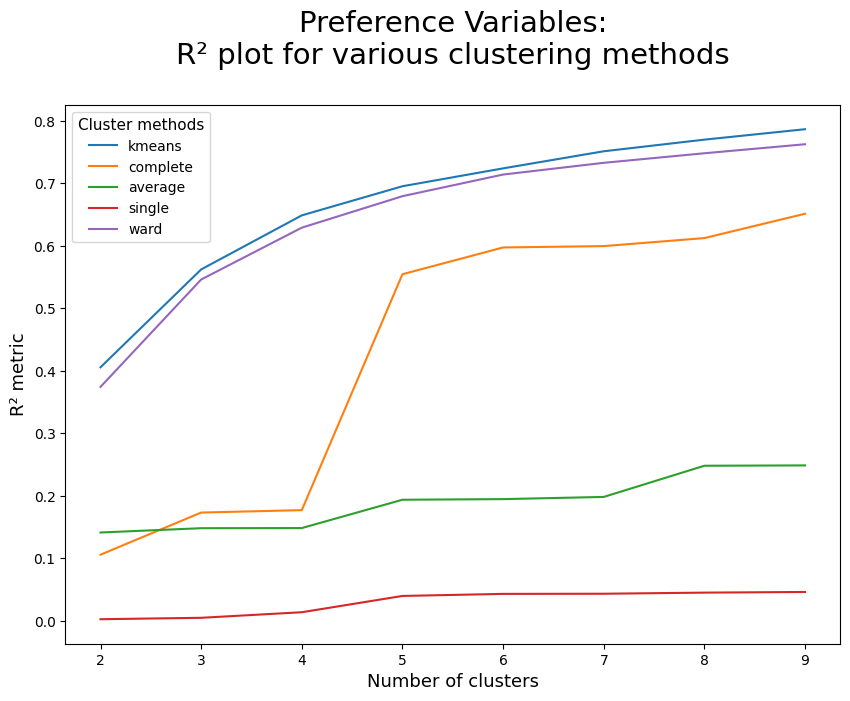

In [ ]:
plot_r2_scores(dem_no_r2_scores)

In [ ]:
dem_st_r2_scores = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores

,kmeans,complete,average,single,ward
2,0.156731,0.026963,0.026963,0.026963,0.141040
3,0.266731,0.138484,0.138484,0.138484,0.250752
4,0.343356,0.186315,0.138949,0.138949,0.335290
5,0.403946,0.192578,0.145349,0.139971,0.391012
6,0.456587,0.196171,0.191342,0.140103,0.445719
7,0.497636,0.199394,0.195276,0.142160,0.479125
8,0.536643,0.244606,0.197828,0.142607,0.507035
9,0.559663,0.326277,0.198375,0.142846,0.527234


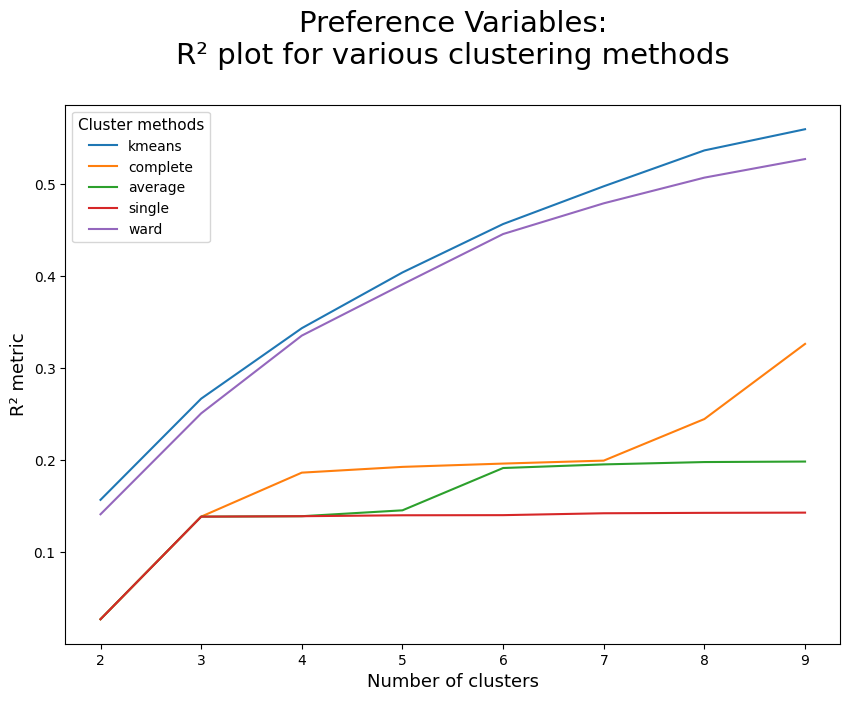

In [ ]:
plot_r2_scores(dem_st_r2_scores)

In [ ]:
dem_mm_r2_scores = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores

,kmeans,complete,average,single,ward
2,0.584177,0.583513,0.022533,0.022533,0.580504
3,0.667505,0.600969,0.025561,0.023221,0.645765
4,0.690744,0.626469,0.604773,0.023380,0.680155
5,0.713028,0.630052,0.605993,0.023515,0.702283
6,0.732374,0.647854,0.606273,0.026475,0.723632
7,0.745068,0.663077,0.606416,0.026540,0.739581
8,0.756899,0.725131,0.606886,0.026592,0.753443
9,0.777686,0.726865,0.606951,0.026691,0.766595


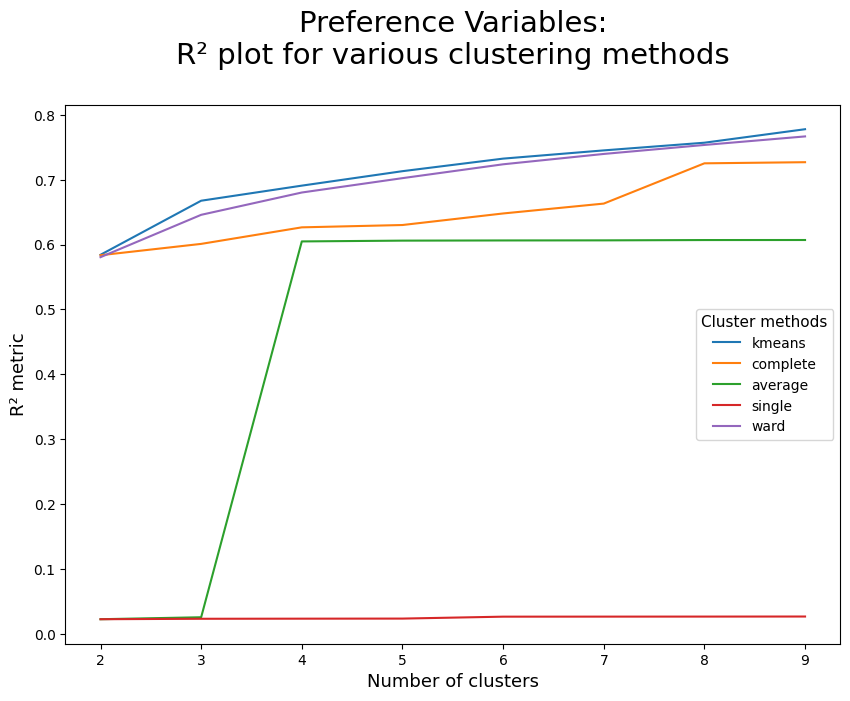

In [ ]:
plot_r2_scores(dem_mm_r2_scores)

In [ ]:
dem_rb_r2_scores = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores

,kmeans,complete,average,single,ward
2,0.721013,0.433484,0.642101,0.004193,0.681458
3,0.888946,0.854352,0.690527,0.004387,0.861087
4,0.928392,0.869278,0.694716,0.061307,0.921921
5,0.948171,0.901776,0.711738,0.061327,0.940791
6,0.957170,0.905963,0.944374,0.070558,0.954402
7,0.966031,0.907490,0.945790,0.127888,0.963358
8,0.971810,0.908682,0.950810,0.139842,0.969005
9,0.975442,0.916744,0.951316,0.210872,0.972654


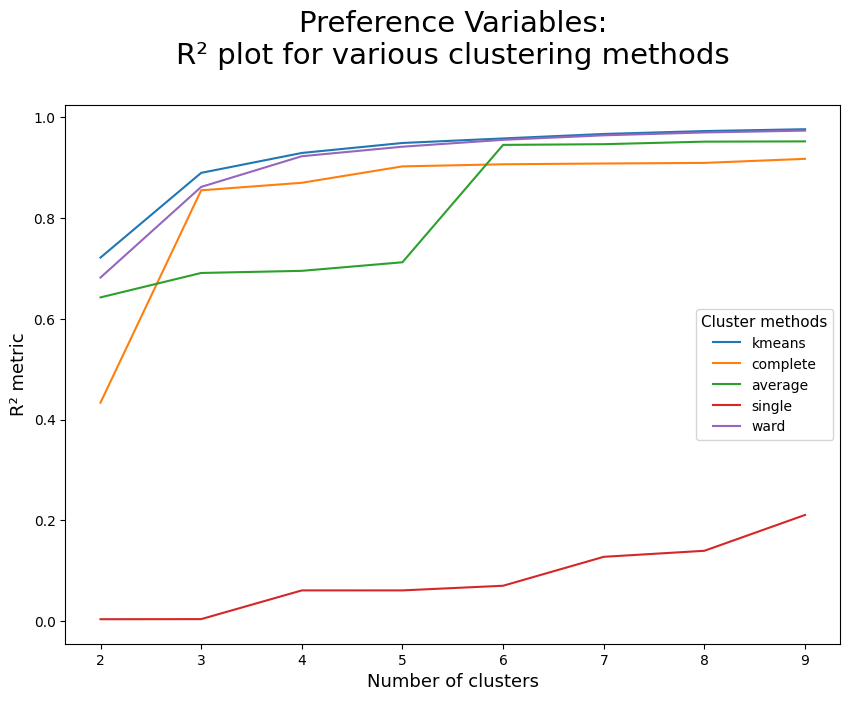

In [ ]:
plot_r2_scores(dem_rb_r2_scores)

In [12]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst

def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


def get_r2_df(df, feats, kmeans_model, hierar_model):
  # Obtaining the R² scores for each cluster solution

  r2_scores = {}
  r2_scores['kmeans'] = get_r2_scores(df[feats], kmeans_model)

  for linkage in ['ward']:
      r2_scores[linkage] = get_r2_scores(
          df[feats], hierar_model.set_params(linkage=linkage)
      )

  return pd.DataFrame(r2_scores)

# TODAS MENOS: FLAGGED

## individual

In [15]:
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'credit_factor', 'zip_code']

In [18]:
dem_no_r2_scores_f = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores_f

,kmeans,ward
2,0.405575,0.374170
3,0.562177,0.546033
4,0.648692,0.630527
5,0.695322,0.680896
6,0.723919,0.712314
7,0.751276,0.731080
8,0.769896,0.746381
9,0.786567,0.761497


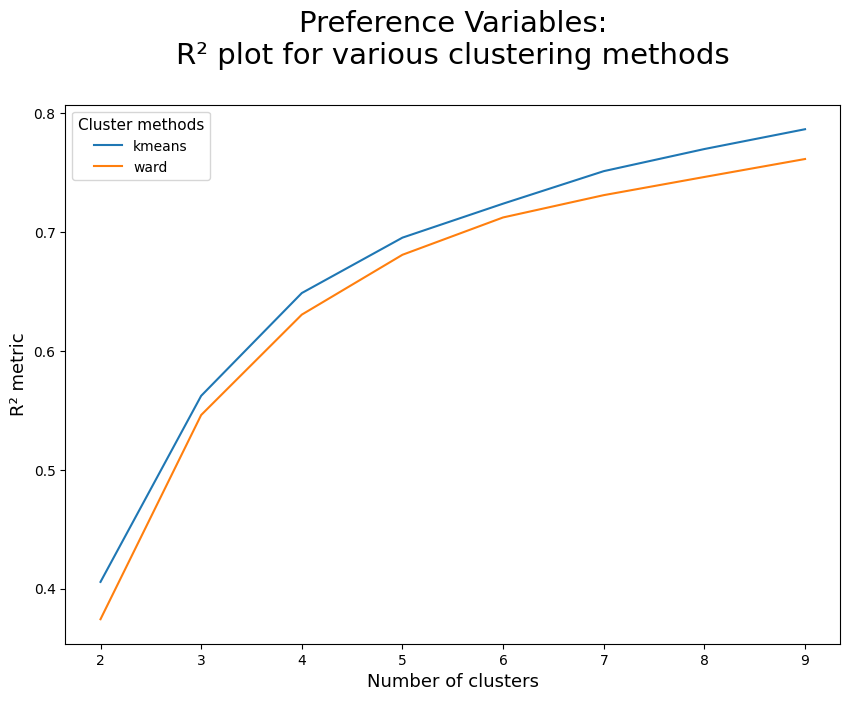

In [19]:
plot_r2_scores(dem_no_r2_scores_f)

In [20]:
dem_st_r2_scores_f = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores_f

,kmeans,ward
2,0.174564,0.156766
3,0.264975,0.253083
4,0.339802,0.320000
5,0.398783,0.382512
6,0.447311,0.423782
7,0.490928,0.449862
8,0.520129,0.472369
9,0.543862,0.494800


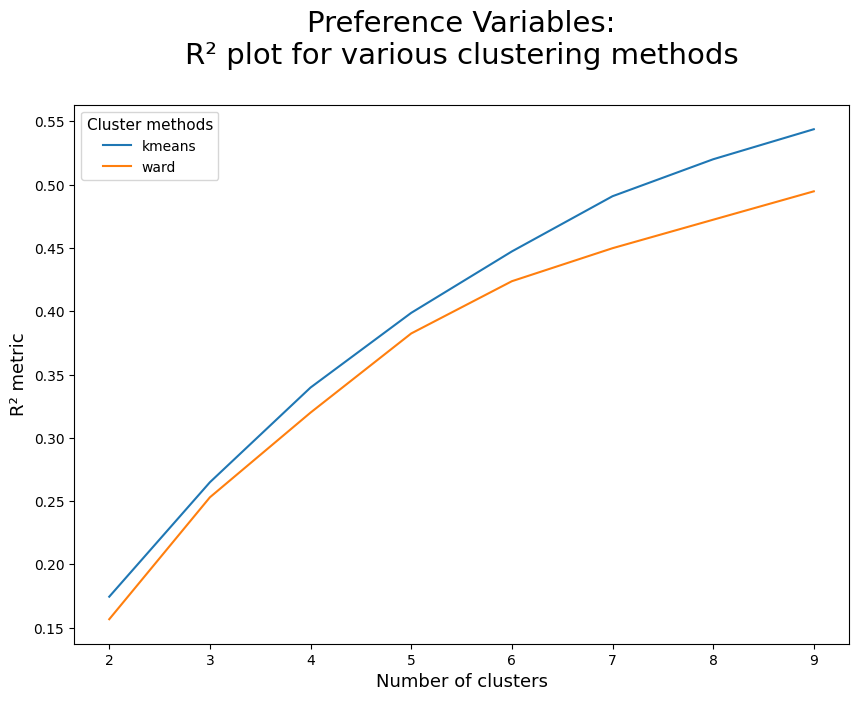

In [21]:
plot_r2_scores(dem_st_r2_scores_f)

In [22]:
dem_mm_r2_scores_f = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores_f

,kmeans,ward
2,0.594851,0.594207
3,0.679675,0.662557
4,0.702373,0.694591
5,0.724418,0.720218
6,0.744108,0.742390
7,0.764853,0.755439
8,0.775896,0.767815
9,0.792580,0.779269


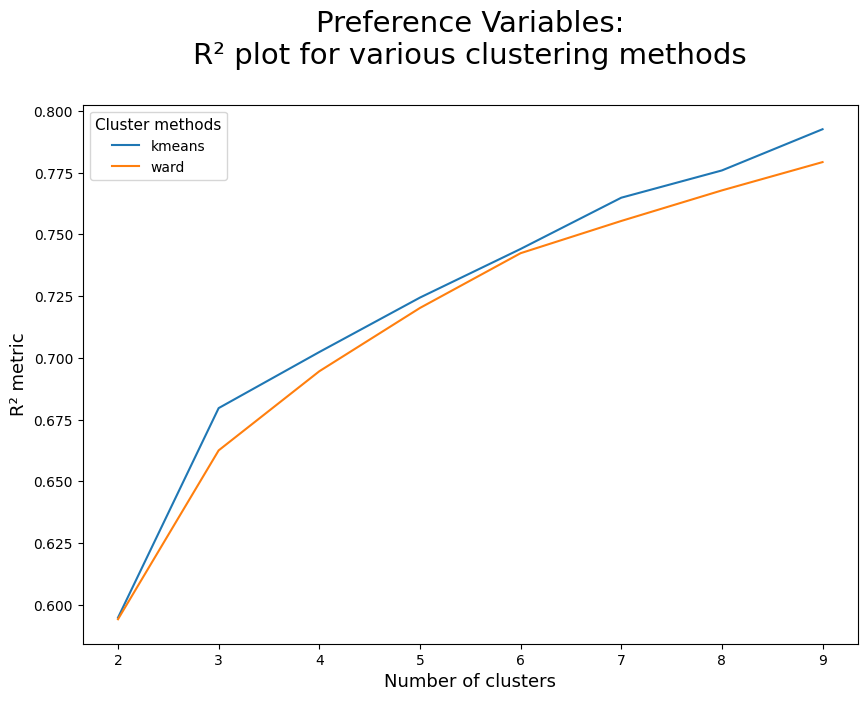

In [23]:
plot_r2_scores(dem_mm_r2_scores_f)

In [16]:
dem_rb_r2_scores_f = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores_f

,kmeans,ward
2,0.721025,0.681470
3,0.888962,0.883914
4,0.928408,0.917954
5,0.948187,0.938749
6,0.957187,0.952360
7,0.966048,0.961317
8,0.971827,0.970112
9,0.975460,0.973761


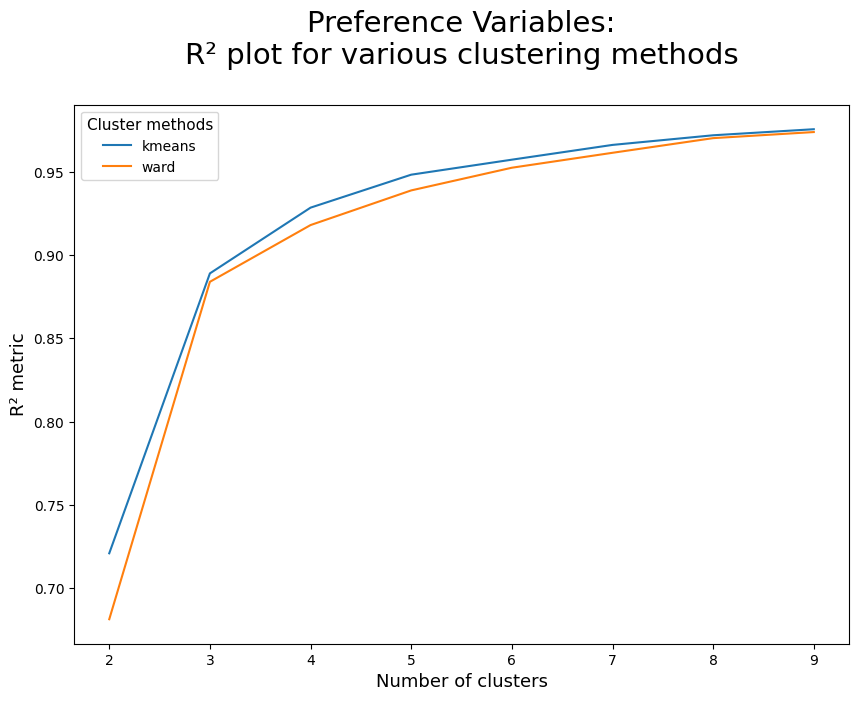

In [17]:
plot_r2_scores(dem_rb_r2_scores_f)

## conjunto

In [33]:
# Prefix the names of the columns
df_no_prefixed_f = dem_no_r2_scores_f.add_prefix("f_no_")
df_st_prefixed_f = dem_st_r2_scores_f.add_prefix("f_st_")
df_mm_prefixed_f = dem_mm_r2_scores_f.add_prefix("f_mm_")
df_rb_prefixed_f = dem_rb_r2_scores_f.add_prefix("f_rb_")

# Concatenate the dataframes
df_combined_f = pd.concat([df_no_prefixed_f, df_st_prefixed_f, df_mm_prefixed_f, df_rb_prefixed_f], axis=1)
df_combined_f

,f_no_kmeans,f_no_ward,f_st_kmeans,f_st_ward,f_mm_kmeans,f_mm_ward,f_rb_kmeans,f_rb_ward
2,0.405575,0.374170,0.174564,0.156766,0.594851,0.594207,0.721025,0.681470
3,0.562177,0.546033,0.264975,0.253083,0.679675,0.662557,0.888962,0.883914
4,0.648692,0.630527,0.339802,0.320000,0.702373,0.694591,0.928408,0.917954
5,0.695322,0.680896,0.398783,0.382512,0.724418,0.720218,0.948187,0.938749
6,0.723919,0.712314,0.447311,0.423782,0.744108,0.742390,0.957187,0.952360
7,0.751276,0.731080,0.490928,0.449862,0.764853,0.755439,0.966048,0.961317
8,0.769896,0.746381,0.520129,0.472369,0.775896,0.767815,0.971827,0.970112
9,0.786567,0.761497,0.543862,0.494800,0.792580,0.779269,0.975460,0.973761


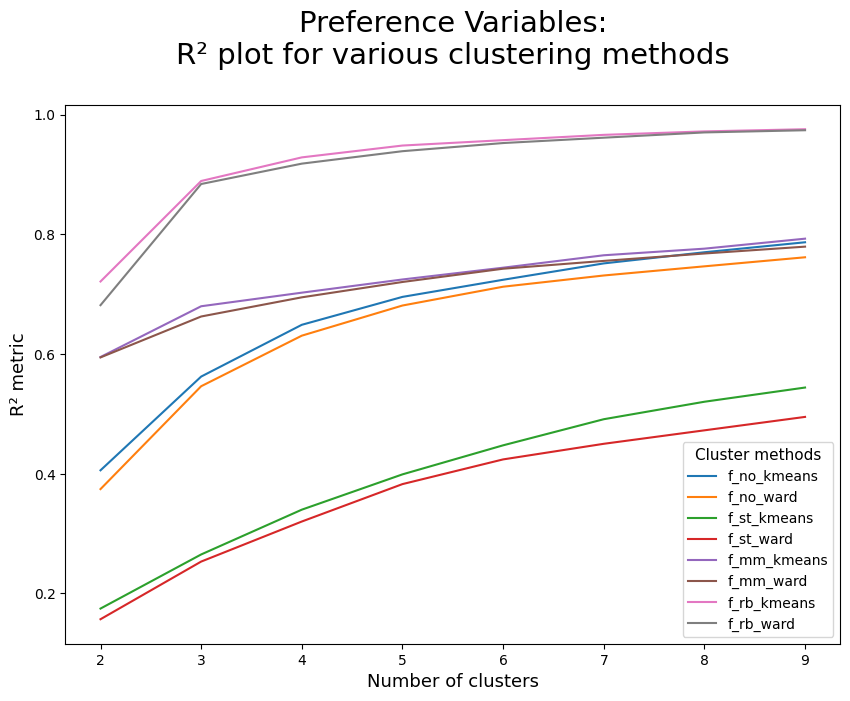

In [34]:
plot_r2_scores(df_combined_f)

# TODAS MENOS: RETURNS

## individual

In [24]:
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'flaged', 'credit_factor', 'zip_code']

In [25]:
dem_no_r2_scores_r = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores_r

,kmeans,ward
2,0.524682,0.524682
3,0.638991,0.635904
4,0.703525,0.692394
5,0.741335,0.726349
6,0.766282,0.748324
7,0.787701,0.769157
8,0.808758,0.787884
9,0.826213,0.805358


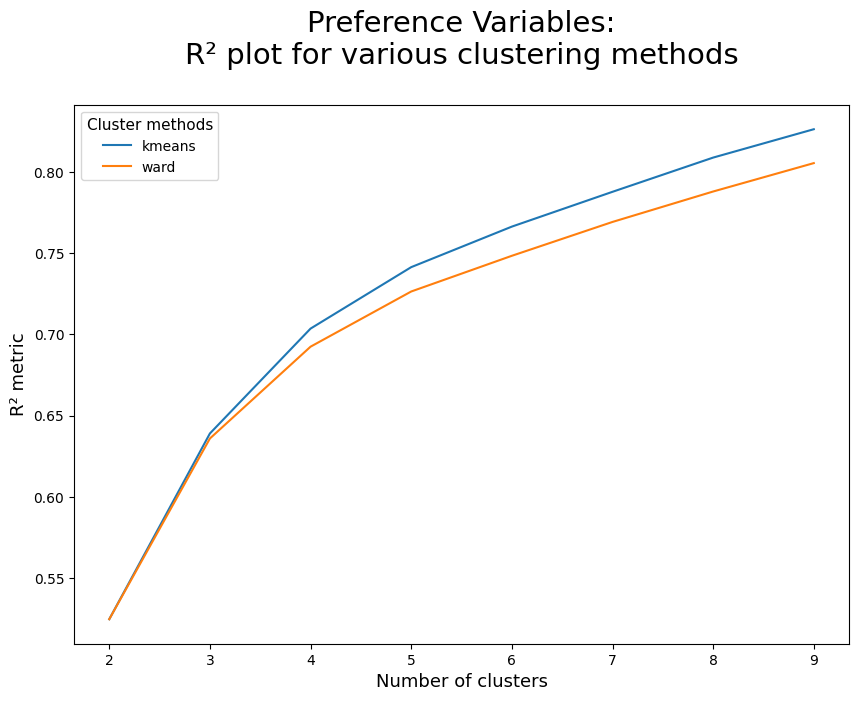

In [26]:
plot_r2_scores(dem_no_r2_scores_r)

In [27]:
dem_st_r2_scores_r = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores_r

,kmeans,ward
2,0.173227,0.159909
3,0.291599,0.278110
4,0.358357,0.373249
5,0.430886,0.435870
6,0.489187,0.472079
7,0.531641,0.506560
8,0.561887,0.530402
9,0.586186,0.552653


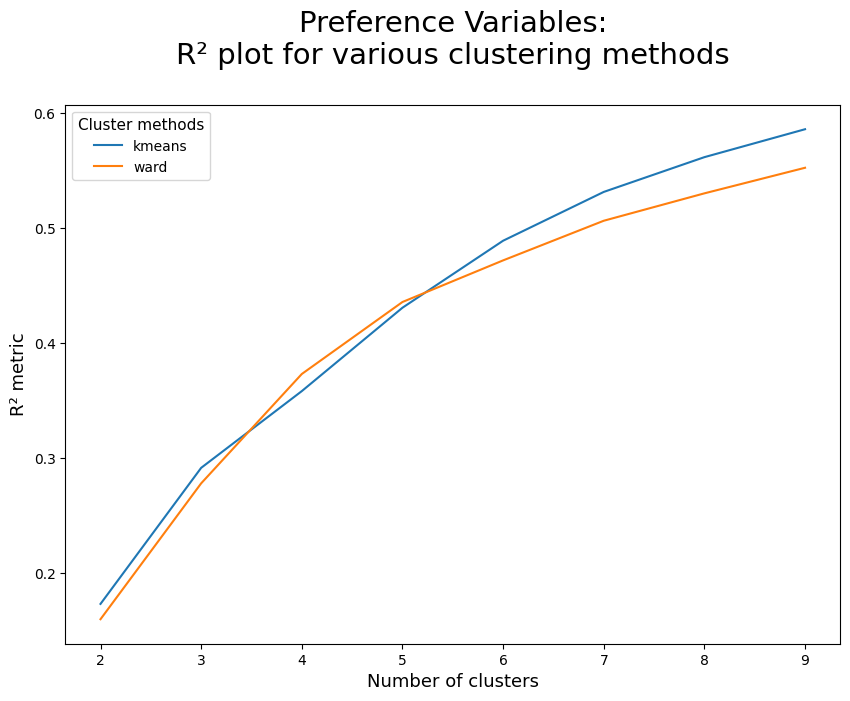

In [28]:
plot_r2_scores(dem_st_r2_scores_r)

In [29]:
dem_mm_r2_scores_r = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores_r

,kmeans,ward
2,0.589164,0.585490
3,0.673169,0.648145
4,0.699399,0.682532
5,0.713337,0.708439
6,0.734373,0.729919
7,0.751665,0.748385
8,0.770068,0.764266
9,0.788240,0.778525


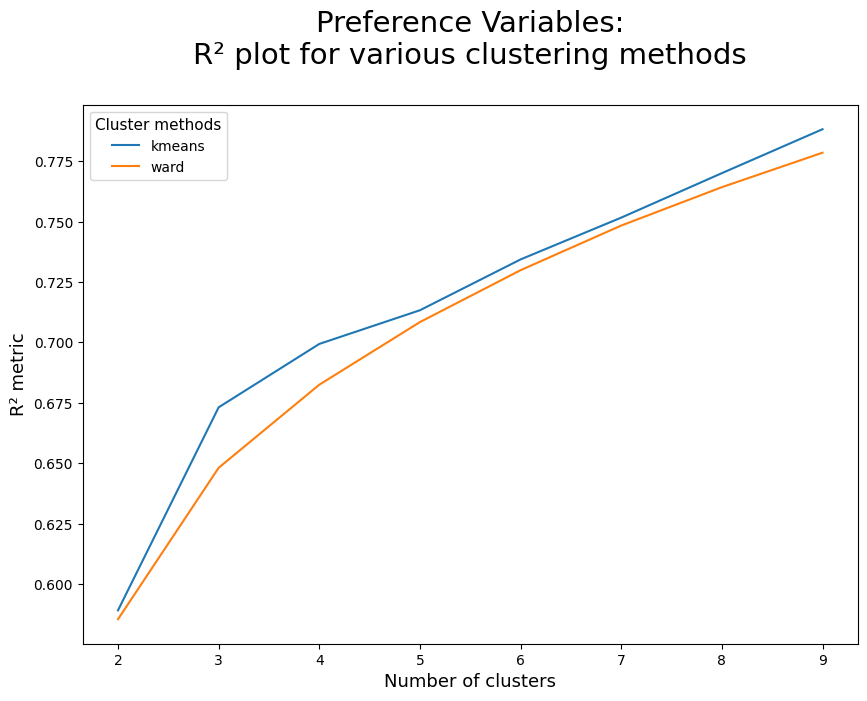

In [30]:
plot_r2_scores(dem_mm_r2_scores_r)

In [31]:
dem_rb_r2_scores_r = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores_r

,kmeans,ward
2,0.384921,0.384072
3,0.529342,0.528847
4,0.632742,0.632633
5,0.684494,0.683213
6,0.732521,0.726788
7,0.769954,0.759200
8,0.786908,0.773438
9,0.798504,0.784560


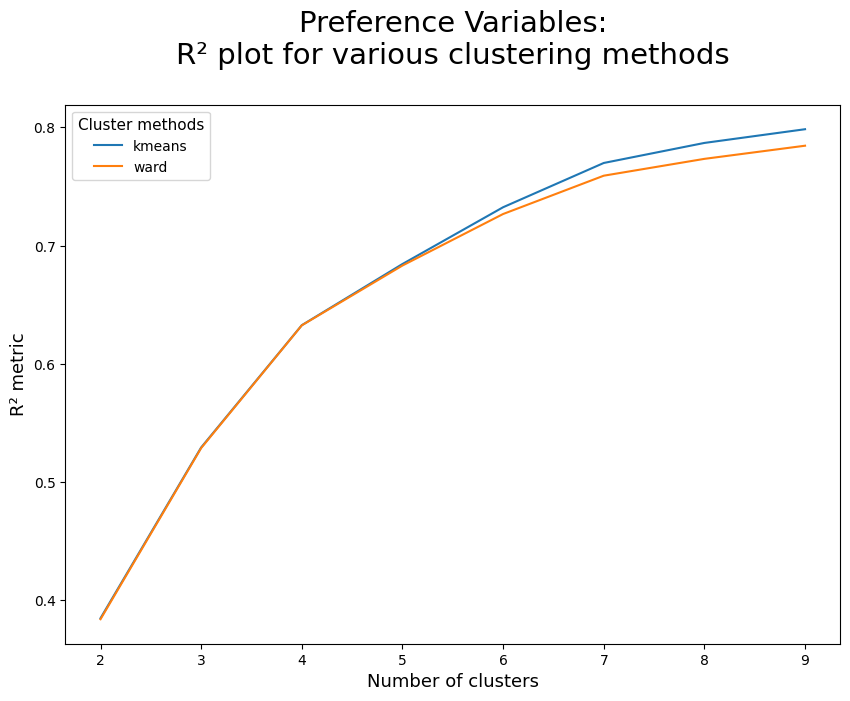

In [32]:
plot_r2_scores(dem_rb_r2_scores_r)

## conjunto

In [35]:
# Prefix the names of the columns
df_no_prefixed_r = dem_no_r2_scores_r.add_prefix("r_no_")
df_st_prefixed_r = dem_st_r2_scores_r.add_prefix("r_st_")
df_mm_prefixed_r = dem_mm_r2_scores_r.add_prefix("r_mm_")
df_rb_prefixed_r = dem_rb_r2_scores_r.add_prefix("r_rb_")

# Concatenate the dataframes
df_combined_r = pd.concat([df_no_prefixed_r, df_st_prefixed_r, df_mm_prefixed_r, df_rb_prefixed_r], axis=1)
df_combined_r

,r_no_kmeans,r_no_ward,r_st_kmeans,r_st_ward,r_mm_kmeans,r_mm_ward,r_rb_kmeans,r_rb_ward
2,0.524682,0.524682,0.173227,0.159909,0.589164,0.585490,0.384921,0.384072
3,0.638991,0.635904,0.291599,0.278110,0.673169,0.648145,0.529342,0.528847
4,0.703525,0.692394,0.358357,0.373249,0.699399,0.682532,0.632742,0.632633
5,0.741335,0.726349,0.430886,0.435870,0.713337,0.708439,0.684494,0.683213
6,0.766282,0.748324,0.489187,0.472079,0.734373,0.729919,0.732521,0.726788
7,0.787701,0.769157,0.531641,0.506560,0.751665,0.748385,0.769954,0.759200
8,0.808758,0.787884,0.561887,0.530402,0.770068,0.764266,0.786908,0.773438
9,0.826213,0.805358,0.586186,0.552653,0.788240,0.778525,0.798504,0.784560


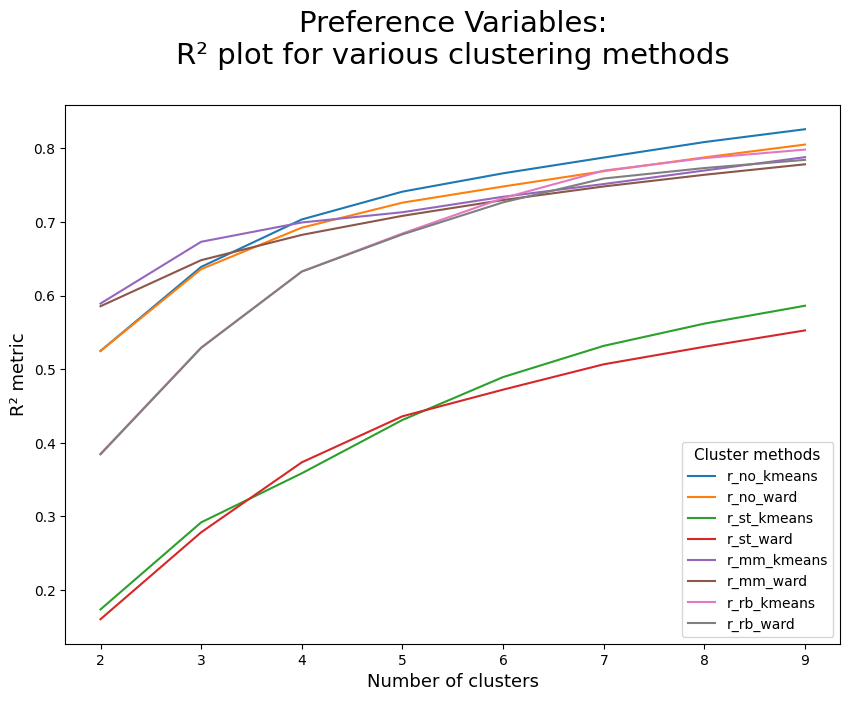

In [36]:
plot_r2_scores(df_combined_r)

# TODAS MENOS: RETURNS E FLAGGED

## Individual

In [37]:
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'credit_factor', 'zip_code']

In [38]:
dem_no_r2_scores_fr = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores_fr

,kmeans,ward
2,0.524684,0.524684
3,0.638994,0.636130
4,0.703529,0.690560
5,0.741339,0.725557
6,0.766286,0.747452
7,0.787705,0.766442
8,0.808762,0.785417
9,0.826217,0.802944


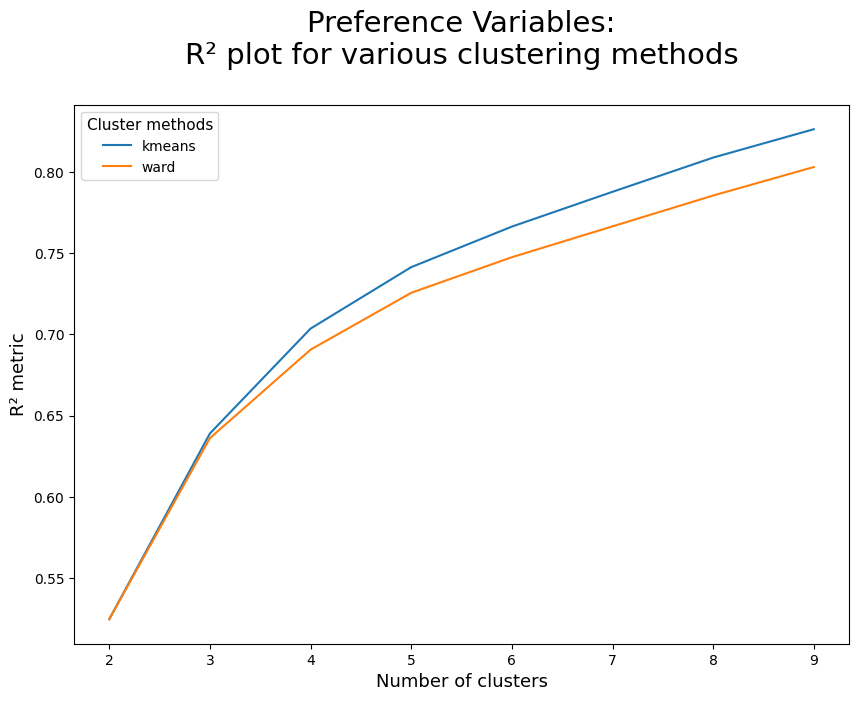

In [39]:
plot_r2_scores(dem_no_r2_scores_fr)

In [40]:
dem_st_r2_scores_fr = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores_fr

,kmeans,ward
2,0.195325,0.171160
3,0.296226,0.284116
4,0.357869,0.355694
5,0.423857,0.415566
6,0.473482,0.455020
7,0.504504,0.480147
8,0.533761,0.501357
9,0.558343,0.520168


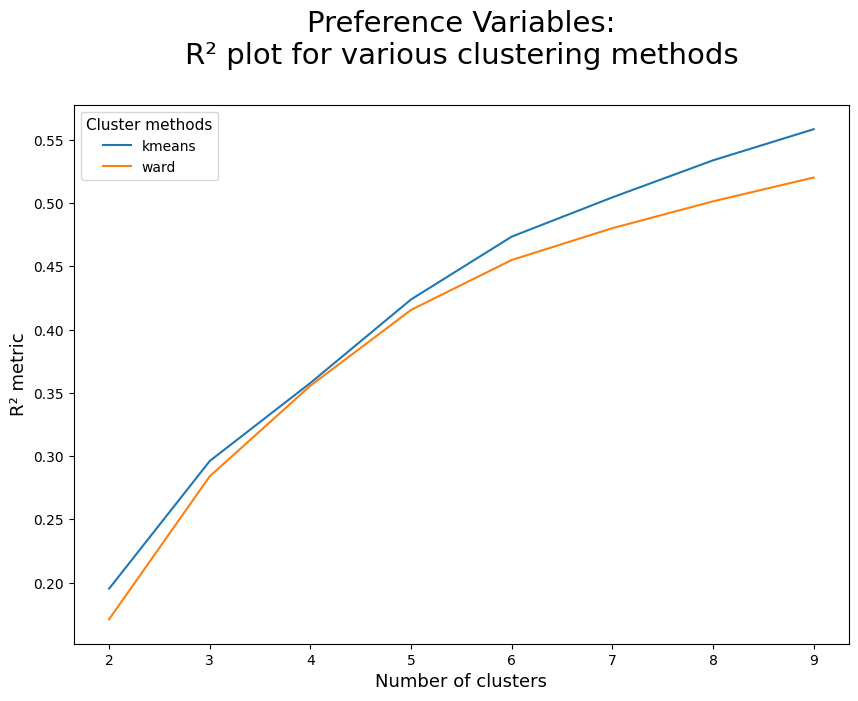

In [41]:
plot_r2_scores(dem_st_r2_scores_fr)

In [42]:
dem_mm_r2_scores_fr = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores_fr

,kmeans,ward
2,0.600023,0.599456
3,0.685549,0.663840
4,0.710639,0.695974
5,0.733066,0.722414
6,0.750166,0.744800
7,0.765241,0.763615
8,0.781829,0.778079
9,0.799760,0.790018


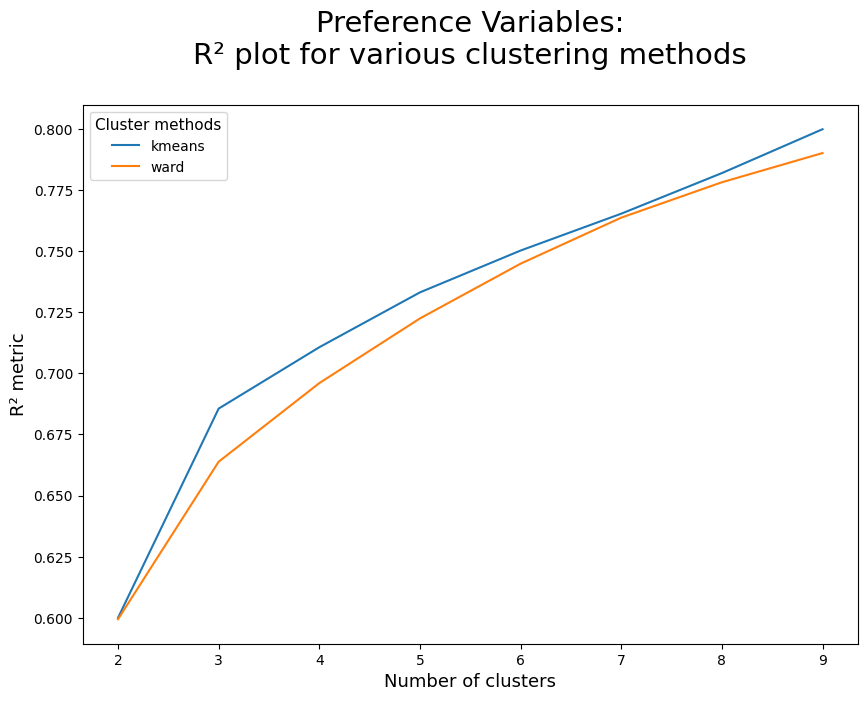

In [43]:
plot_r2_scores(dem_mm_r2_scores_fr)

In [44]:
dem_rb_r2_scores_fr = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores_fr

,kmeans,ward
2,0.385198,0.384349
3,0.529723,0.529228
4,0.633198,0.633090
5,0.684987,0.683705
6,0.733048,0.727270
7,0.770508,0.761929
8,0.787474,0.776031
9,0.799025,0.787517


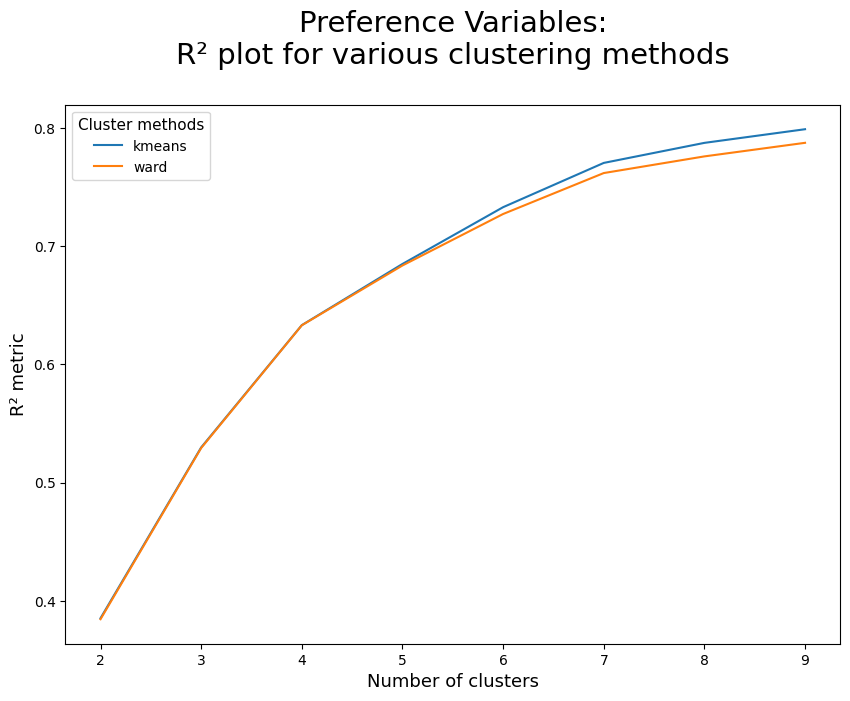

In [45]:
plot_r2_scores(dem_rb_r2_scores_fr)

## conjunto

In [46]:
# Prefix the names of the columns
df_no_prefixed_fr = dem_no_r2_scores_fr.add_prefix("fr_no_")
df_st_prefixed_fr = dem_st_r2_scores_fr.add_prefix("fr_st_")
df_mm_prefixed_fr = dem_mm_r2_scores_fr.add_prefix("fr_mm_")
df_rb_prefixed_fr = dem_rb_r2_scores_fr.add_prefix("fr_rb_")

# Concatenate the dataframes
df_combined_fr = pd.concat([df_no_prefixed_fr, df_st_prefixed_fr, df_mm_prefixed_fr, df_rb_prefixed_fr], axis=1)
df_combined_fr

,fr_no_kmeans,fr_no_ward,fr_st_kmeans,fr_st_ward,fr_mm_kmeans,fr_mm_ward,fr_rb_kmeans,fr_rb_ward
2,0.524684,0.524684,0.195325,0.171160,0.600023,0.599456,0.385198,0.384349
3,0.638994,0.636130,0.296226,0.284116,0.685549,0.663840,0.529723,0.529228
4,0.703529,0.690560,0.357869,0.355694,0.710639,0.695974,0.633198,0.633090
5,0.741339,0.725557,0.423857,0.415566,0.733066,0.722414,0.684987,0.683705
6,0.766286,0.747452,0.473482,0.455020,0.750166,0.744800,0.733048,0.727270
7,0.787705,0.766442,0.504504,0.480147,0.765241,0.763615,0.770508,0.761929
8,0.808762,0.785417,0.533761,0.501357,0.781829,0.778079,0.787474,0.776031
9,0.826217,0.802944,0.558343,0.520168,0.799760,0.790018,0.799025,0.787517


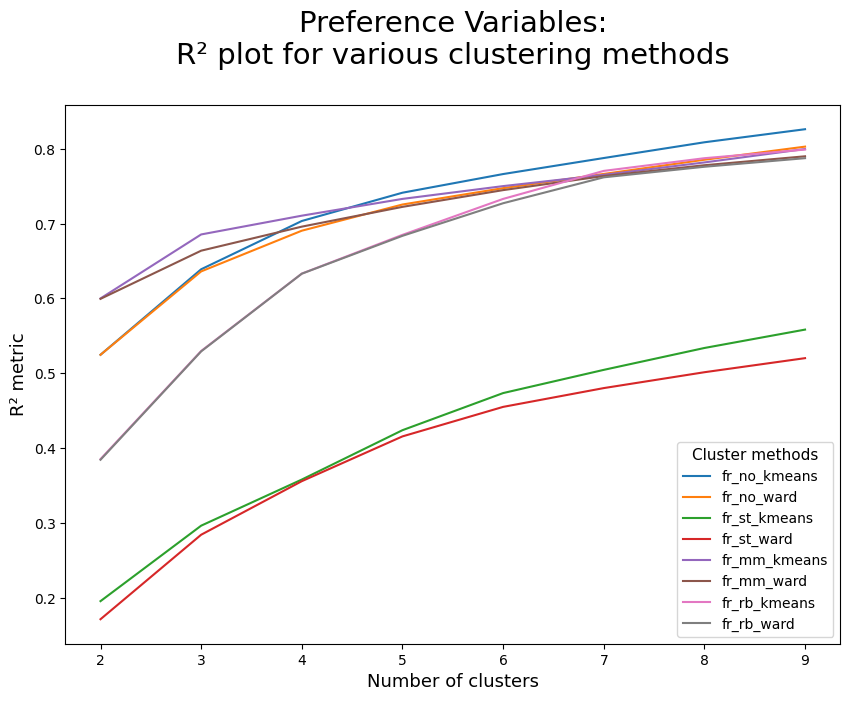

In [47]:
plot_r2_scores(df_combined_fr)

# TODAS MENOS: RETURNS, FLAGGED, RELEVANCE CRITERIA, ZIPCODE

## individual

In [48]:
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'recency_in_weeks', 'promotional_percentage', 'credit_factor']

In [49]:
dem_no_r2_scores_frlz = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores_frlz

,kmeans,ward
2,0.527986,0.527986
3,0.637115,0.619166
4,0.702593,0.691178
5,0.741163,0.727772
6,0.766522,0.749557
7,0.787806,0.770920
8,0.809061,0.789255
9,0.826531,0.806287


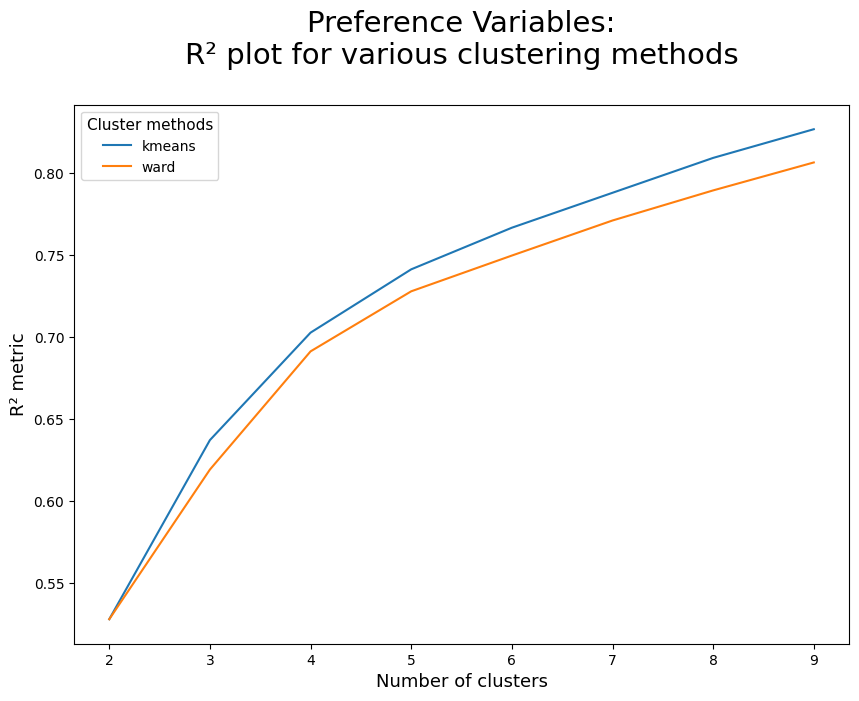

In [50]:
plot_r2_scores(dem_no_r2_scores_frlz)

In [51]:
dem_st_r2_scores_frlz = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores_frlz

,kmeans,ward
2,0.138713,0.114681
3,0.258203,0.222932
4,0.333654,0.299167
5,0.401891,0.356226
6,0.456276,0.394905
7,0.493792,0.431468
8,0.528672,0.459737
9,0.555381,0.483521


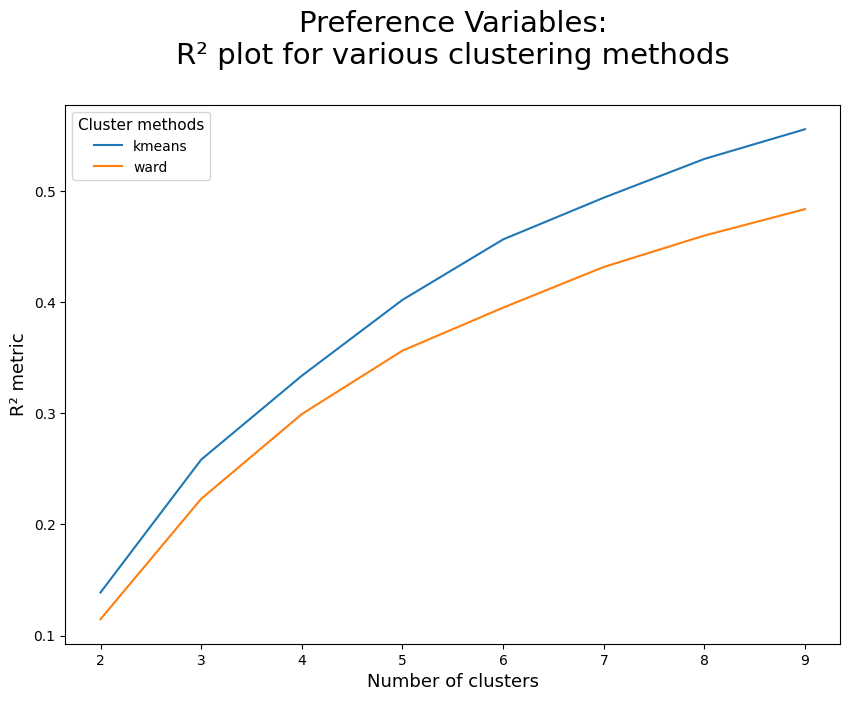

In [52]:
plot_r2_scores(dem_st_r2_scores_frlz)

In [53]:
dem_mm_r2_scores_frlz = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores_frlz

,kmeans,ward
2,0.391939,0.391939
3,0.494215,0.474361
4,0.545691,0.529136
5,0.592640,0.566604
6,0.625729,0.592590
7,0.654435,0.614579
8,0.676322,0.633314
9,0.697432,0.651720


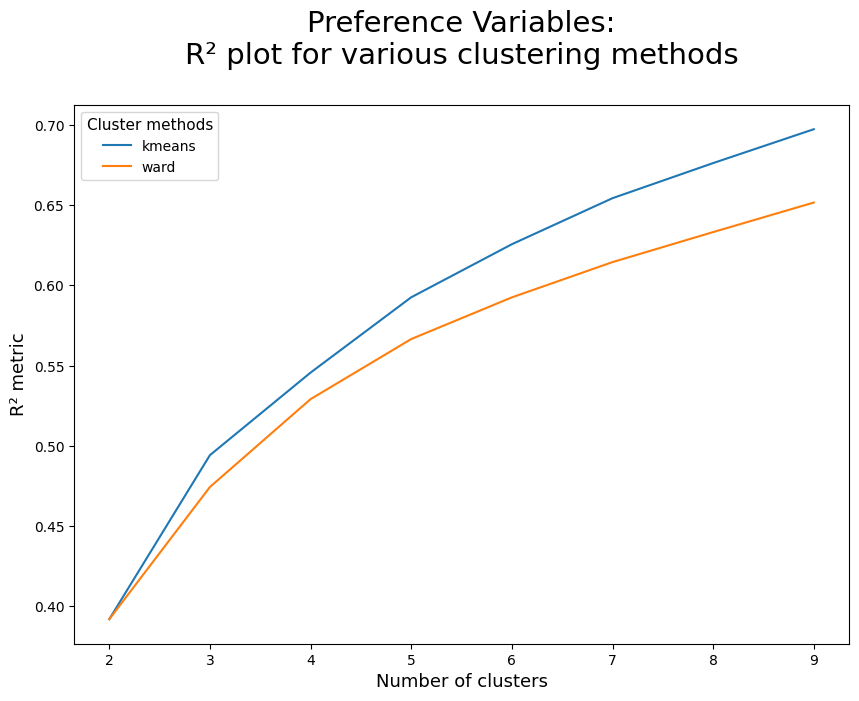

In [54]:
plot_r2_scores(dem_mm_r2_scores_frlz)

In [55]:
dem_rb_r2_scores_frlz = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores_frlz

,kmeans,ward
2,0.396210,0.395346
3,0.544994,0.544497
4,0.651423,0.651313
5,0.704087,0.703954
6,0.753454,0.747297
7,0.787783,0.781278
8,0.806670,0.796312
9,0.818571,0.807457


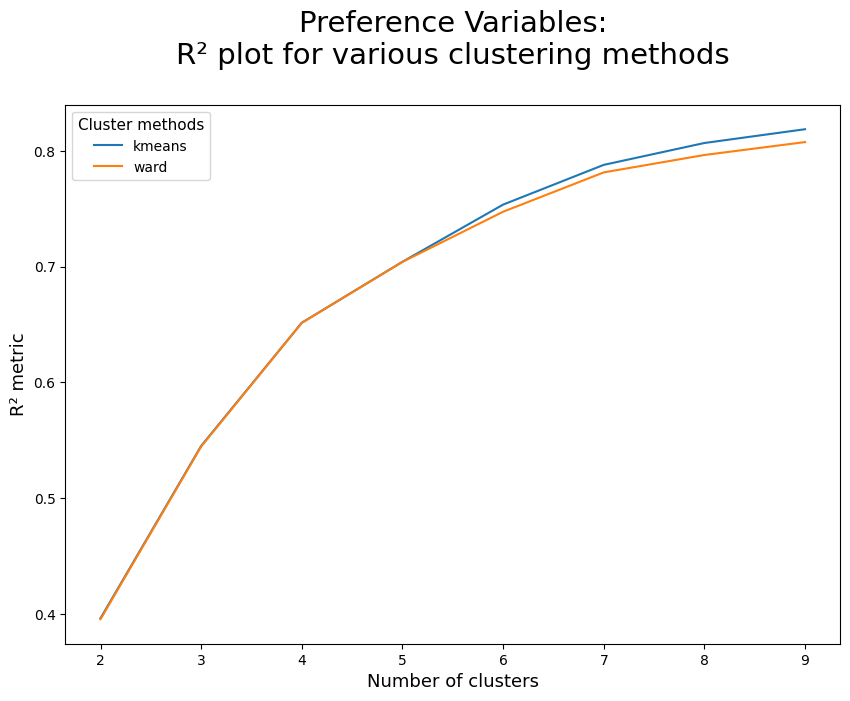

In [56]:
plot_r2_scores(dem_rb_r2_scores_frlz)

## conjunto

In [57]:
# Prefix the names of the columns
df_no_prefixed_frlz = dem_no_r2_scores_frlz.add_prefix("frlz_no_")
df_st_prefixed_frlz = dem_st_r2_scores_frlz.add_prefix("frlz_st_")
df_mm_prefixed_frlz = dem_mm_r2_scores_frlz.add_prefix("frlz_mm_")
df_rb_prefixed_frlz = dem_rb_r2_scores_frlz.add_prefix("frlz_rb_")

# Concatenate the dataframes
df_combined_frlz = pd.concat([df_no_prefixed_frlz, df_st_prefixed_frlz, df_mm_prefixed_frlz, df_rb_prefixed_frlz], axis=1)
df_combined_frlz

,frlz_no_kmeans,frlz_no_ward,frlz_st_kmeans,frlz_st_ward,frlz_mm_kmeans,frlz_mm_ward,frlz_rb_kmeans,frlz_rb_ward
2,0.527986,0.527986,0.138713,0.114681,0.391939,0.391939,0.396210,0.395346
3,0.637115,0.619166,0.258203,0.222932,0.494215,0.474361,0.544994,0.544497
4,0.702593,0.691178,0.333654,0.299167,0.545691,0.529136,0.651423,0.651313
5,0.741163,0.727772,0.401891,0.356226,0.592640,0.566604,0.704087,0.703954
6,0.766522,0.749557,0.456276,0.394905,0.625729,0.592590,0.753454,0.747297
7,0.787806,0.770920,0.493792,0.431468,0.654435,0.614579,0.787783,0.781278
8,0.809061,0.789255,0.528672,0.459737,0.676322,0.633314,0.806670,0.796312
9,0.826531,0.806287,0.555381,0.483521,0.697432,0.651720,0.818571,0.807457


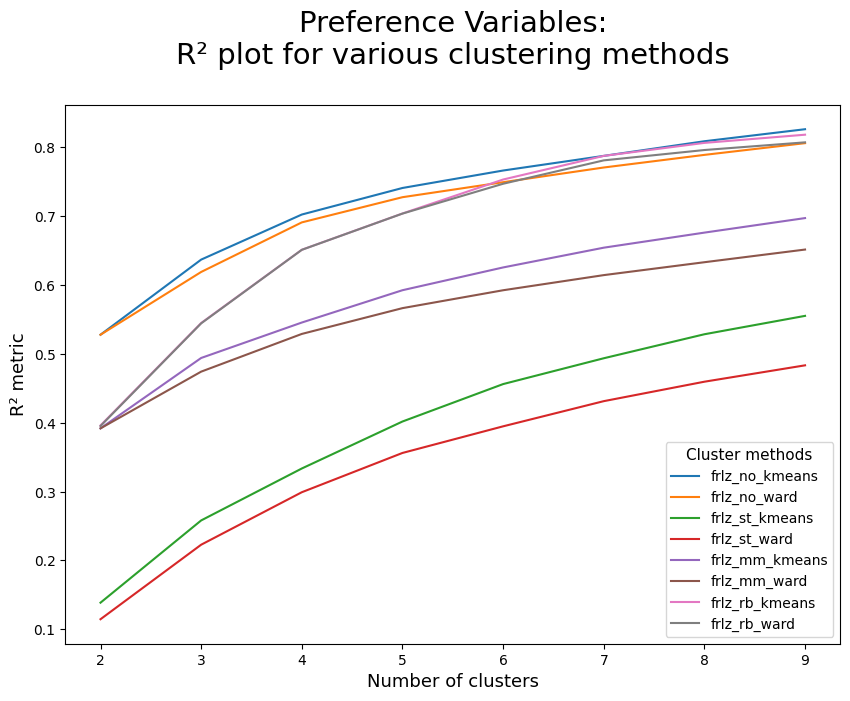

In [58]:
plot_r2_scores(df_combined_frlz)

# TODAS MENOS: LONGEVITY MONTHS, RETURNS, ZIP CODE

## individual

In [59]:
demographic_metrics = ['frequency_items', 'potencial_score', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'flaged', 'credit_factor']

In [60]:
dem_no_r2_scores_grz = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores_grz

,kmeans,ward
2,0.555365,0.555365
3,0.668659,0.653774
4,0.737642,0.730135
5,0.778354,0.767966
6,0.804962,0.792427
7,0.827284,0.812194
8,0.849533,0.831955
9,0.867651,0.851367


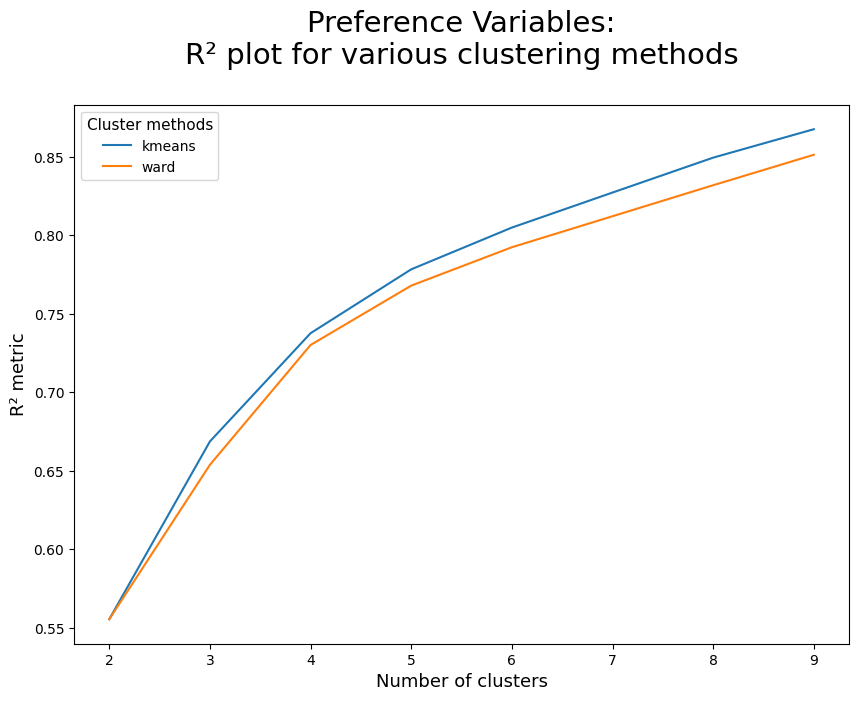

In [61]:
plot_r2_scores(dem_no_r2_scores_grz)

In [62]:
dem_st_r2_scores_grz = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores_grz

,kmeans,ward
2,0.152902,0.152902
3,0.271205,0.272738
4,0.386666,0.373421
5,0.478896,0.468535
6,0.538032,0.522255
7,0.595891,0.565780
8,0.633278,0.598523
9,0.661684,0.622874


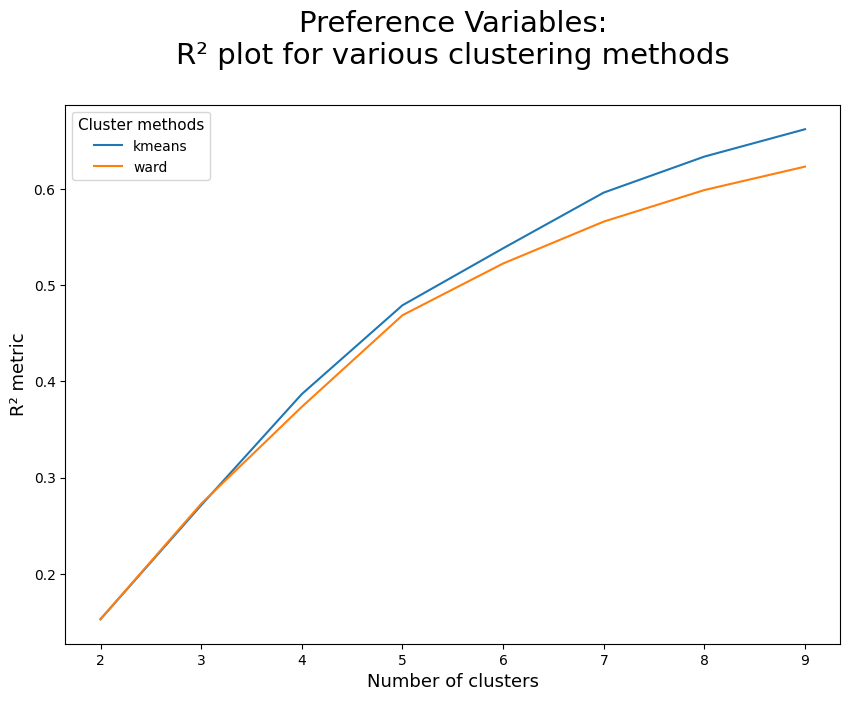

In [63]:
plot_r2_scores(dem_st_r2_scores_grz)

In [64]:
dem_mm_r2_scores_grz = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores_grz

,kmeans,ward
2,0.395511,0.358647
3,0.495461,0.489707
4,0.571365,0.556495
5,0.620709,0.606356
6,0.661687,0.647896
7,0.700703,0.674541
8,0.728036,0.700039
9,0.752340,0.723158


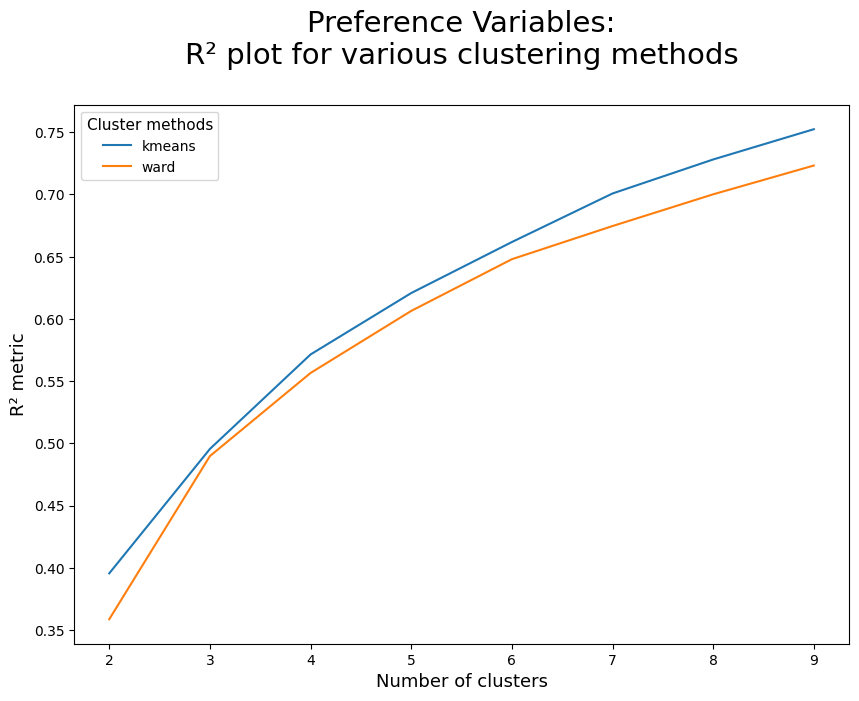

In [65]:
plot_r2_scores(dem_mm_r2_scores_grz)

In [66]:
dem_rb_r2_scores_grz = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores_grz

,kmeans,ward
2,0.408113,0.407231
3,0.561409,0.560908
4,0.671011,0.670937
5,0.725315,0.725192
6,0.776165,0.770562
7,0.811323,0.803435
8,0.830786,0.816616
9,0.842846,0.828521


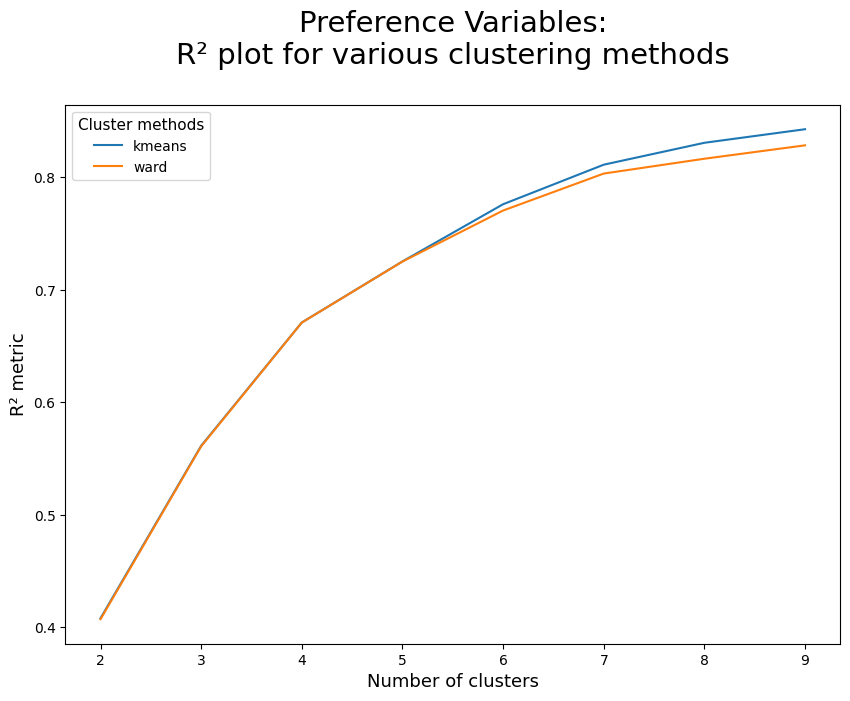

In [67]:
plot_r2_scores(dem_rb_r2_scores_grz)

## conjunto

In [68]:
# Prefix the names of the columns
df_no_prefixed_grz = dem_no_r2_scores_grz.add_prefix("grz_no_")
df_st_prefixed_grz = dem_st_r2_scores_grz.add_prefix("grz_st_")
df_mm_prefixed_grz = dem_mm_r2_scores_grz.add_prefix("grz_mm_")
df_rb_prefixed_grz = dem_rb_r2_scores_grz.add_prefix("grz_rb_")

# Concatenate the dataframes
df_combined_grz = pd.concat([df_no_prefixed_grz, df_st_prefixed_grz, df_mm_prefixed_grz, df_rb_prefixed_grz], axis=1)
df_combined_grz

,grz_no_kmeans,grz_no_ward,grz_st_kmeans,grz_st_ward,grz_mm_kmeans,grz_mm_ward,grz_rb_kmeans,grz_rb_ward
2,0.555365,0.555365,0.152902,0.152902,0.395511,0.358647,0.408113,0.407231
3,0.668659,0.653774,0.271205,0.272738,0.495461,0.489707,0.561409,0.560908
4,0.737642,0.730135,0.386666,0.373421,0.571365,0.556495,0.671011,0.670937
5,0.778354,0.767966,0.478896,0.468535,0.620709,0.606356,0.725315,0.725192
6,0.804962,0.792427,0.538032,0.522255,0.661687,0.647896,0.776165,0.770562
7,0.827284,0.812194,0.595891,0.565780,0.700703,0.674541,0.811323,0.803435
8,0.849533,0.831955,0.633278,0.598523,0.728036,0.700039,0.830786,0.816616
9,0.867651,0.851367,0.661684,0.622874,0.752340,0.723158,0.842846,0.828521


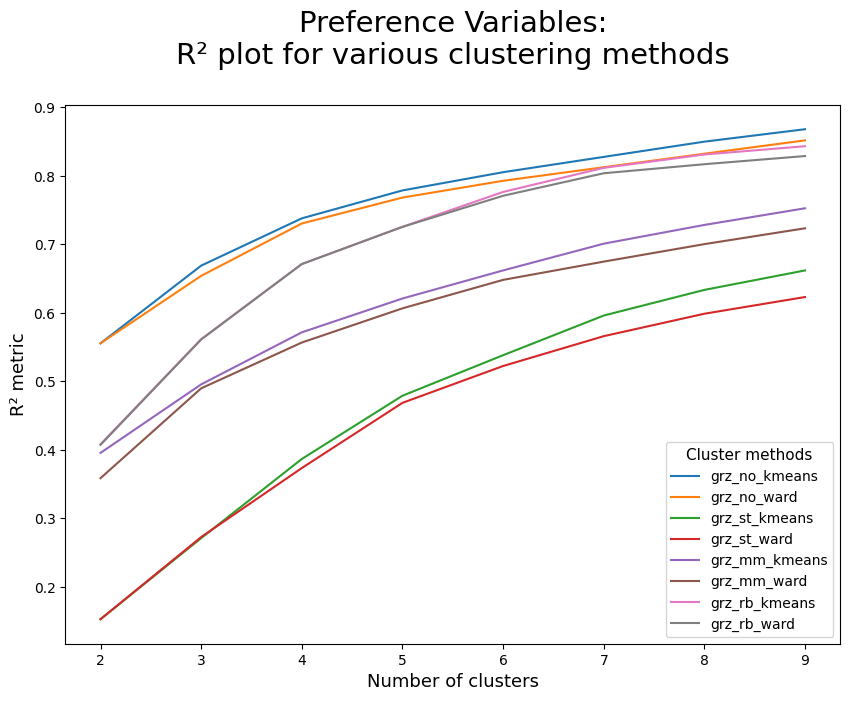

In [69]:
plot_r2_scores(df_combined_grz)

# TODAS MENOS: ZIP CODE

## individual

In [70]:
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor']

In [71]:
dem_no_r2_scores_z = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores_z

,kmeans,ward
2,0.407181,0.374704
3,0.565005,0.548224
4,0.647389,0.627800
5,0.694515,0.678744
6,0.727716,0.713249
7,0.746742,0.733819
8,0.770348,0.751096
9,0.786878,0.766174


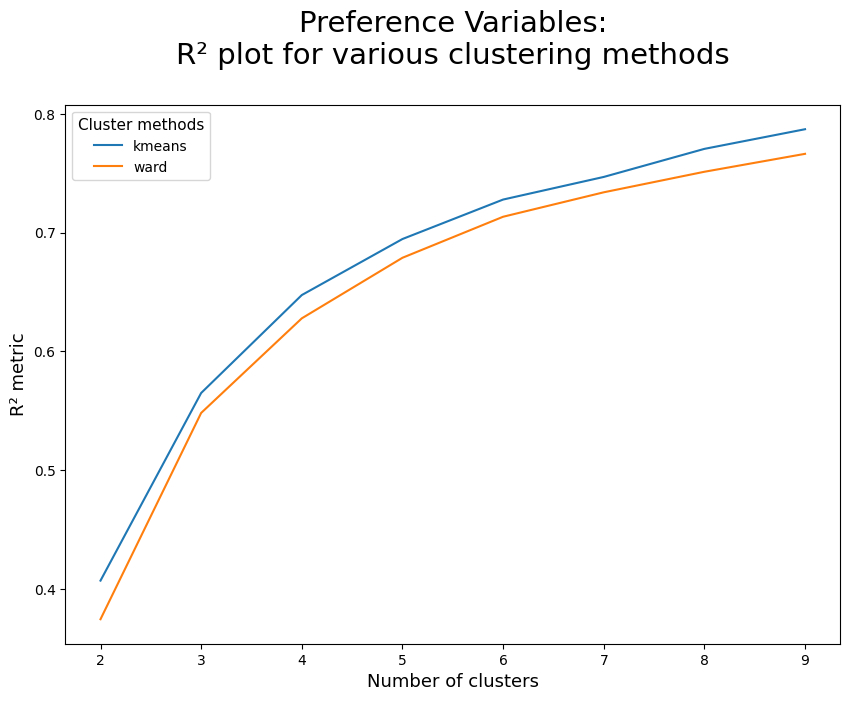

In [72]:
plot_r2_scores(dem_no_r2_scores_z)

In [73]:
dem_st_r2_scores_z = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores_z

,kmeans,ward
2,0.123429,0.123429
3,0.215549,0.215277
4,0.304848,0.293763
5,0.382227,0.365000
6,0.429034,0.424837
7,0.489572,0.468041
8,0.531673,0.499163
9,0.567150,0.525649


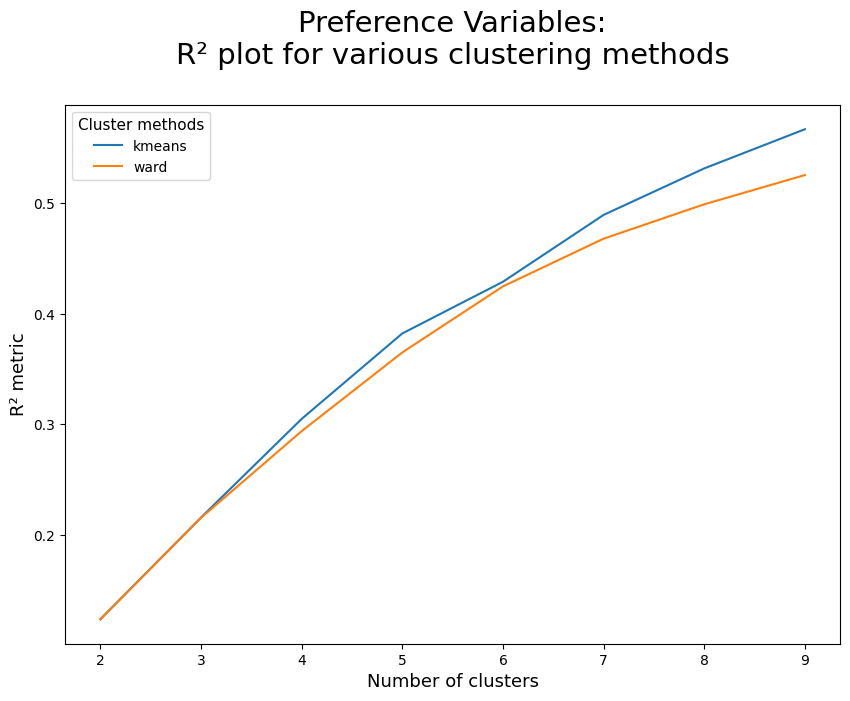

In [74]:
plot_r2_scores(dem_st_r2_scores_z)

In [75]:
dem_mm_r2_scores_z = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores_z

,kmeans,ward
2,0.328565,0.297980
3,0.414322,0.406532
4,0.492870,0.473127
5,0.531038,0.511630
6,0.572328,0.546522
7,0.598323,0.577820
8,0.631075,0.599664
9,0.654446,0.618983


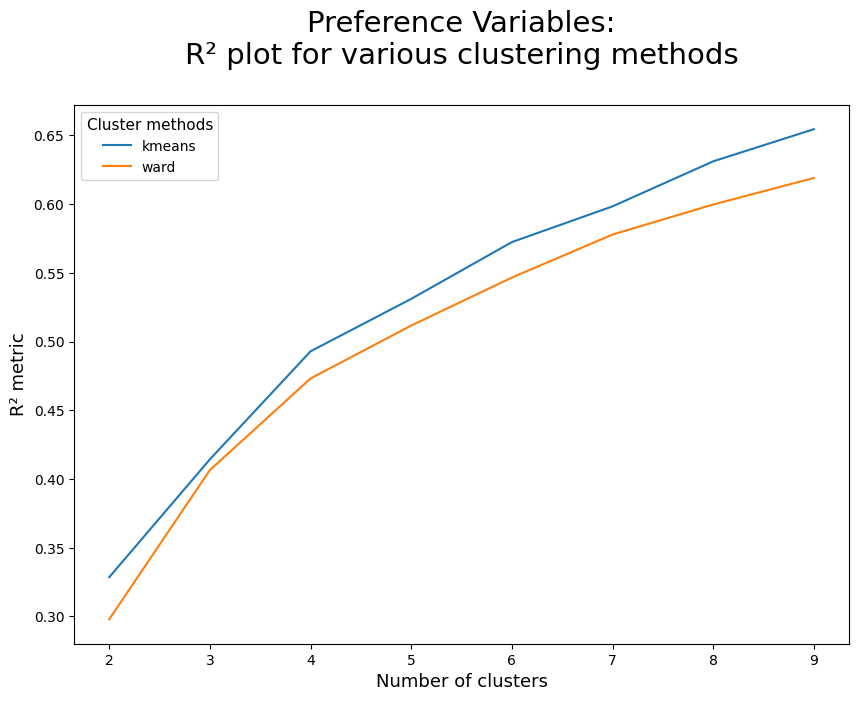

In [76]:
plot_r2_scores(dem_mm_r2_scores_z)

In [77]:
dem_rb_r2_scores_z = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores_z

,kmeans,ward
2,0.721368,0.681794
3,0.889385,0.884334
4,0.928850,0.922474
5,0.948638,0.946104
6,0.957636,0.956487
7,0.966499,0.965440
8,0.972256,0.970628
9,0.975916,0.974278


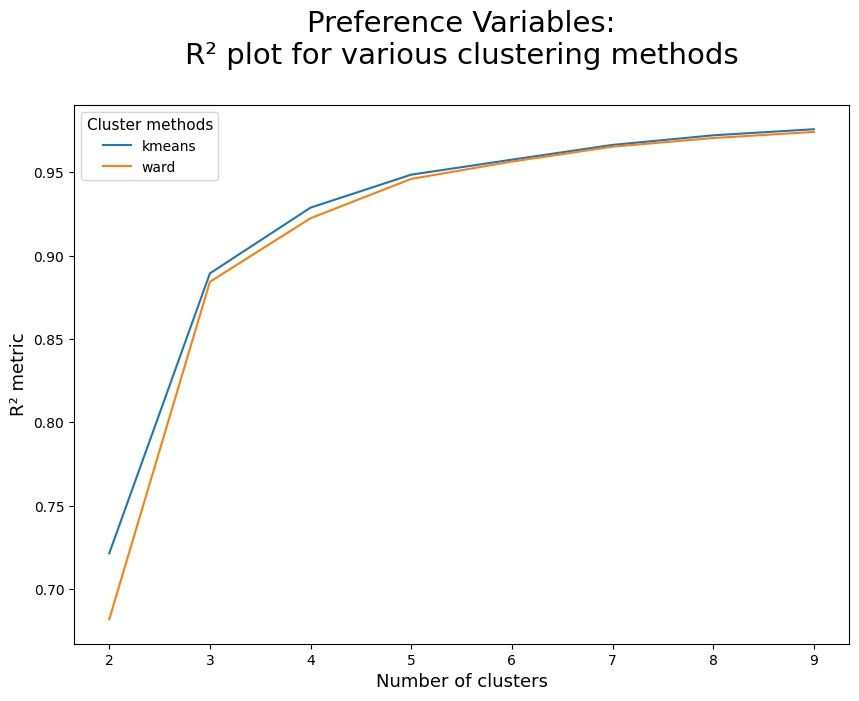

In [78]:
plot_r2_scores(dem_rb_r2_scores_z)

## conjunto

In [79]:
# Prefix the names of the columns
df_no_prefixed_z = dem_no_r2_scores_z.add_prefix("z_no_")
df_st_prefixed_z = dem_st_r2_scores_z.add_prefix("z_st_")
df_mm_prefixed_z = dem_mm_r2_scores_z.add_prefix("z_mm_")
df_rb_prefixed_z = dem_rb_r2_scores_z.add_prefix("z_rb_")

# Concatenate the dataframes
df_combined_z = pd.concat([df_no_prefixed_z, df_st_prefixed_z, df_mm_prefixed_z, df_rb_prefixed_z], axis=1)
df_combined_z

,z_no_kmeans,z_no_ward,z_st_kmeans,z_st_ward,z_mm_kmeans,z_mm_ward,z_rb_kmeans,z_rb_ward
2,0.407181,0.374704,0.123429,0.123429,0.328565,0.297980,0.721368,0.681794
3,0.565005,0.548224,0.215549,0.215277,0.414322,0.406532,0.889385,0.884334
4,0.647389,0.627800,0.304848,0.293763,0.492870,0.473127,0.928850,0.922474
5,0.694515,0.678744,0.382227,0.365000,0.531038,0.511630,0.948638,0.946104
6,0.727716,0.713249,0.429034,0.424837,0.572328,0.546522,0.957636,0.956487
7,0.746742,0.733819,0.489572,0.468041,0.598323,0.577820,0.966499,0.965440
8,0.770348,0.751096,0.531673,0.499163,0.631075,0.599664,0.972256,0.970628
9,0.786878,0.766174,0.567150,0.525649,0.654446,0.618983,0.975916,0.974278


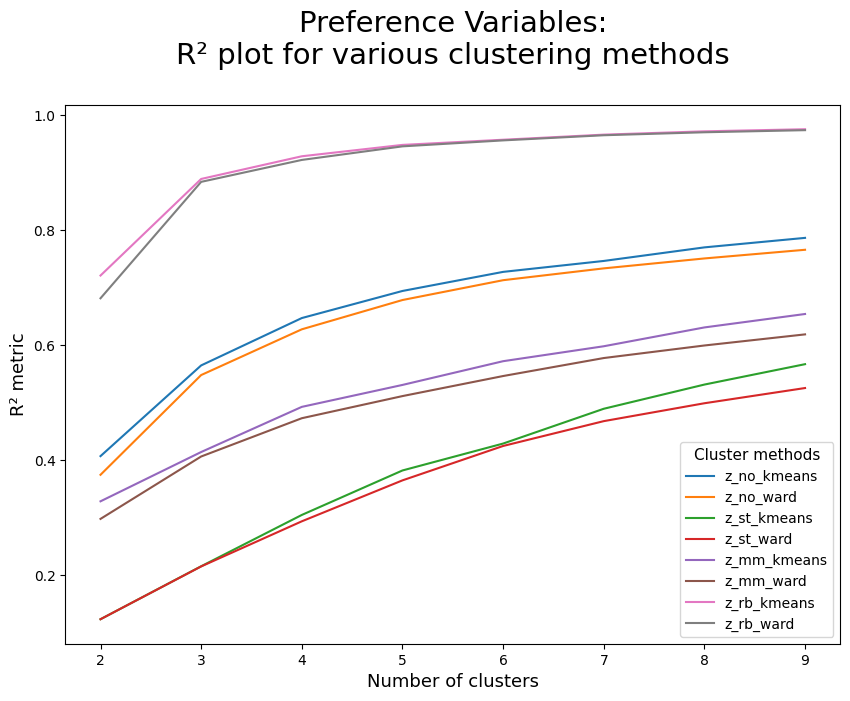

In [80]:
plot_r2_scores(df_combined_z)

# TODAS MENOS: ZIP CODE, RETURNS

## individual

In [81]:
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'flaged', 'credit_factor']

In [82]:
dem_no_r2_scores_Rz = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores_Rz

,kmeans,ward
2,0.527946,0.527946
3,0.637067,0.634675
4,0.702541,0.689160
5,0.741108,0.725752
6,0.766465,0.746045
7,0.787747,0.765962
8,0.809001,0.783814
9,0.826470,0.801585


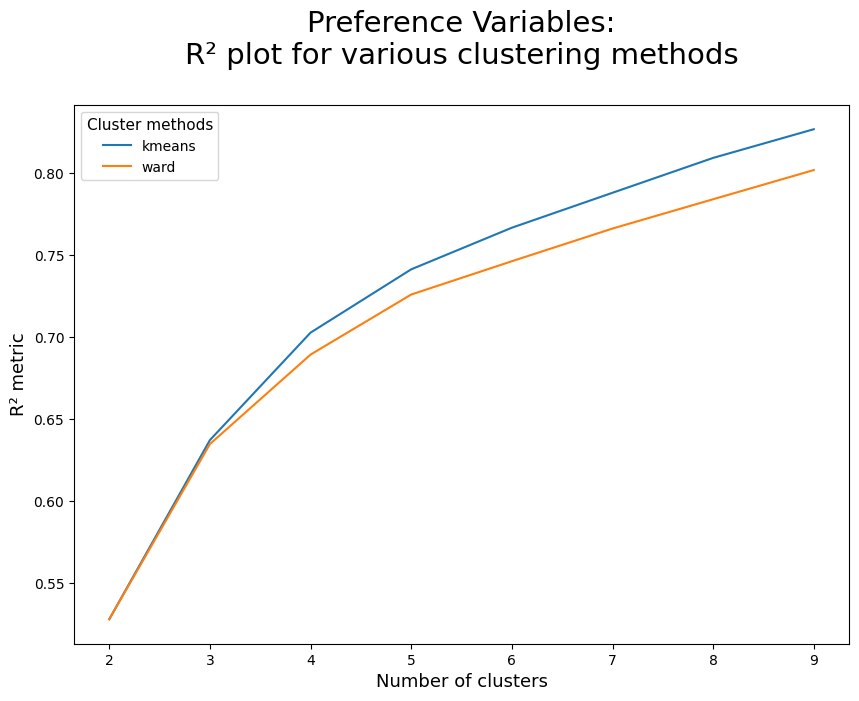

In [83]:
plot_r2_scores(dem_no_r2_scores_Rz)

In [84]:
dem_st_r2_scores_Rz = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores_Rz

,kmeans,ward
2,0.134342,0.134342
3,0.238432,0.239558
4,0.337071,0.326710
5,0.422237,0.402049
6,0.475750,0.452922
7,0.526144,0.491168
8,0.565340,0.517826
9,0.591864,0.542779


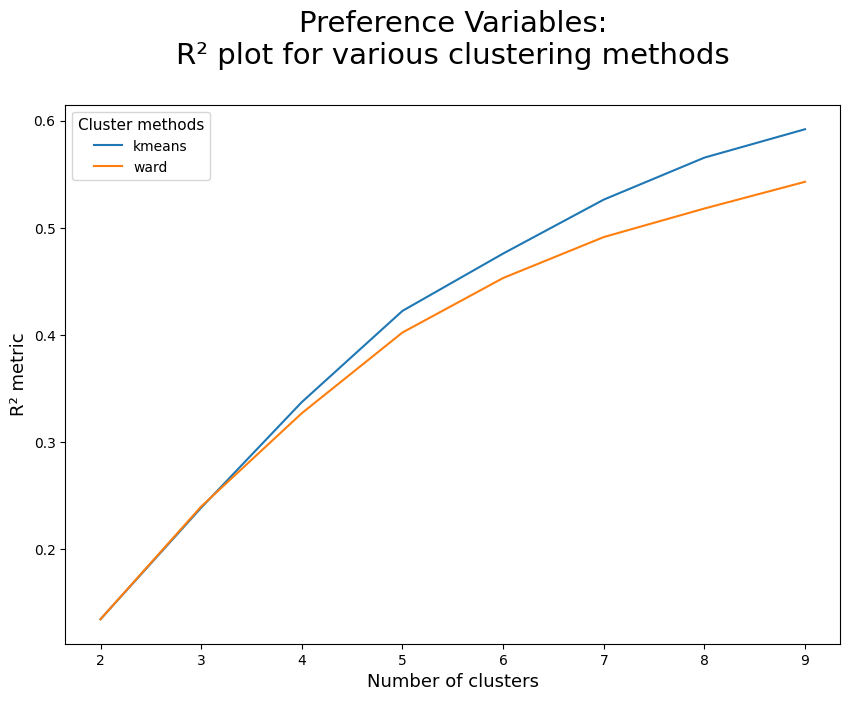

In [86]:
plot_r2_scores(dem_st_r2_scores_Rz)

In [85]:
dem_mm_r2_scores_Rz = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores_Rz

,kmeans,ward
2,0.334034,0.302990
3,0.421239,0.413277
4,0.500947,0.476697
5,0.542520,0.515066
6,0.579752,0.550097
7,0.607906,0.581815
8,0.631963,0.605556
9,0.664586,0.627693


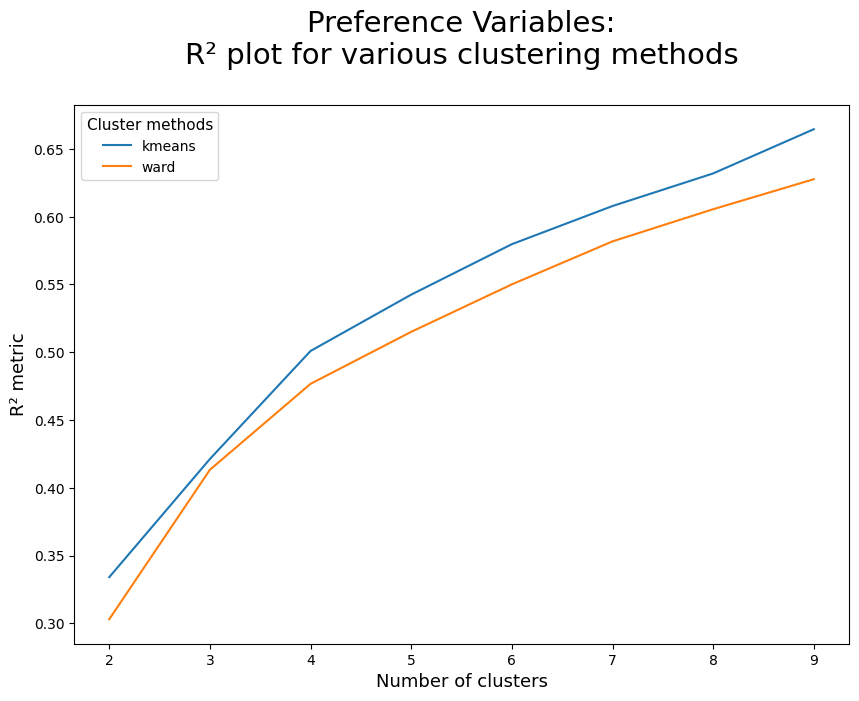

In [87]:
plot_r2_scores(dem_mm_r2_scores_Rz)

In [88]:
dem_rb_r2_scores_Rz = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores_Rz

,kmeans,ward
2,0.392299,0.391445
3,0.518224,0.539116
4,0.644985,0.644876
5,0.696125,0.697682
6,0.746687,0.740267
7,0.780681,0.772055
8,0.799383,0.785314
9,0.811172,0.795030


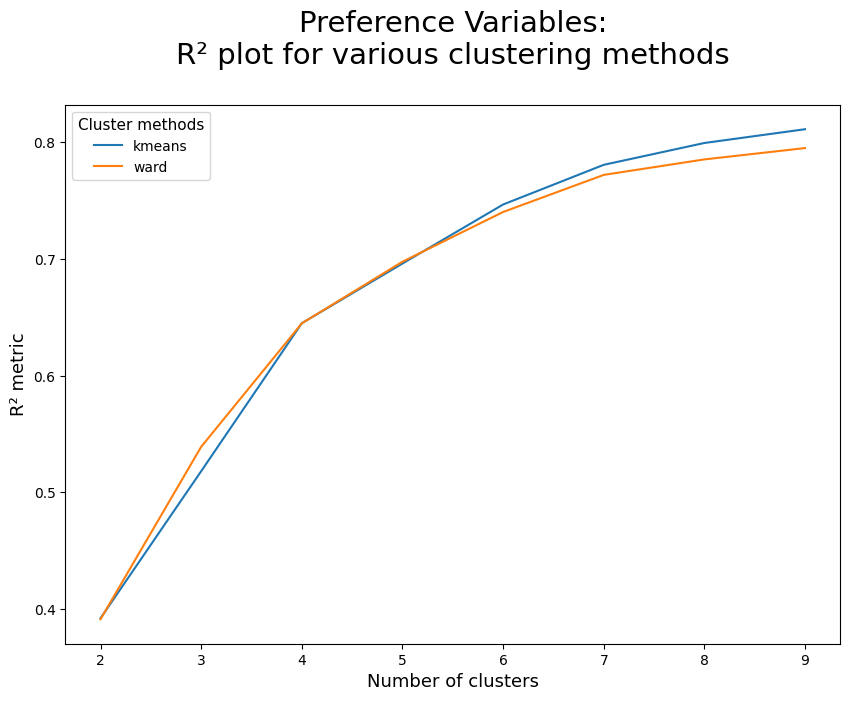

In [89]:
plot_r2_scores(dem_rb_r2_scores_Rz)

## conjunto

In [90]:
# Prefix the names of the columns
df_no_prefixed_Rz = dem_no_r2_scores_Rz.add_prefix("Rz_no_")
df_st_prefixed_Rz = dem_st_r2_scores_Rz.add_prefix("Rz_st_")
df_mm_prefixed_Rz = dem_mm_r2_scores_Rz.add_prefix("Rz_mm_")
df_rb_prefixed_Rz = dem_rb_r2_scores_Rz.add_prefix("Rz_rb_")

# Concatenate the dataframes
df_combined_Rz = pd.concat([df_no_prefixed_Rz, df_st_prefixed_Rz, df_mm_prefixed_Rz, df_rb_prefixed_Rz], axis=1)
df_combined_Rz

,Rz_no_kmeans,Rz_no_ward,Rz_st_kmeans,Rz_st_ward,Rz_mm_kmeans,Rz_mm_ward,Rz_rb_kmeans,Rz_rb_ward
2,0.527946,0.527946,0.134342,0.134342,0.334034,0.302990,0.392299,0.391445
3,0.637067,0.634675,0.238432,0.239558,0.421239,0.413277,0.518224,0.539116
4,0.702541,0.689160,0.337071,0.326710,0.500947,0.476697,0.644985,0.644876
5,0.741108,0.725752,0.422237,0.402049,0.542520,0.515066,0.696125,0.697682
6,0.766465,0.746045,0.475750,0.452922,0.579752,0.550097,0.746687,0.740267
7,0.787747,0.765962,0.526144,0.491168,0.607906,0.581815,0.780681,0.772055
8,0.809001,0.783814,0.565340,0.517826,0.631963,0.605556,0.799383,0.785314
9,0.826470,0.801585,0.591864,0.542779,0.664586,0.627693,0.811172,0.795030


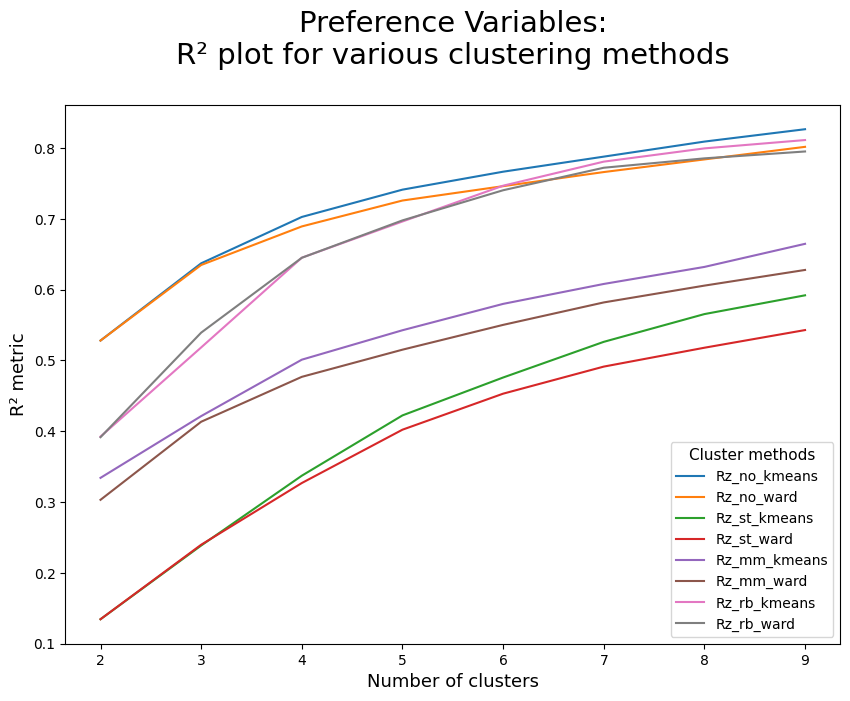

In [91]:
plot_r2_scores(df_combined_Rz)

# TODAS MENOS: CREDIT FACTOR, RETURNS

## individual

In [92]:
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'flaged', 'zip_code']

In [93]:
dem_no_r2_scores_rc = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores_rc

,kmeans,ward
2,0.524931,0.524931
3,0.639290,0.636784
4,0.703854,0.690731
5,0.741635,0.726179
6,0.766593,0.746564
7,0.788046,0.765946
8,0.809109,0.783762
9,0.826549,0.799257


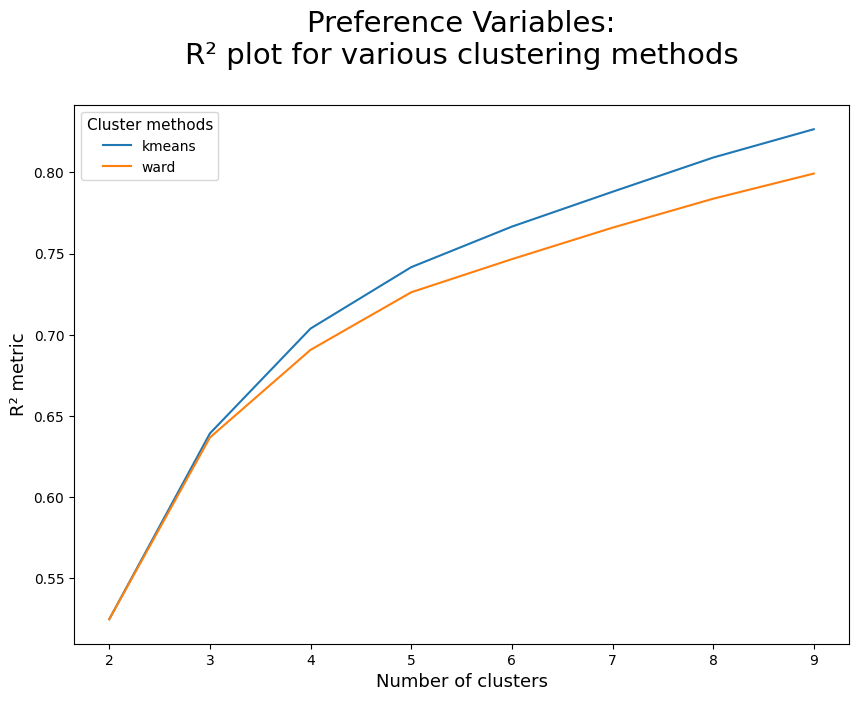

In [94]:
plot_r2_scores(dem_no_r2_scores_rc)

In [95]:
dem_st_r2_scores_rc = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores_rc

,kmeans,ward
2,0.195269,0.171307
3,0.330293,0.306328
4,0.426209,0.416699
5,0.488243,0.477403
6,0.537315,0.510908
7,0.570604,0.540146
8,0.599351,0.561471
9,0.624287,0.582338


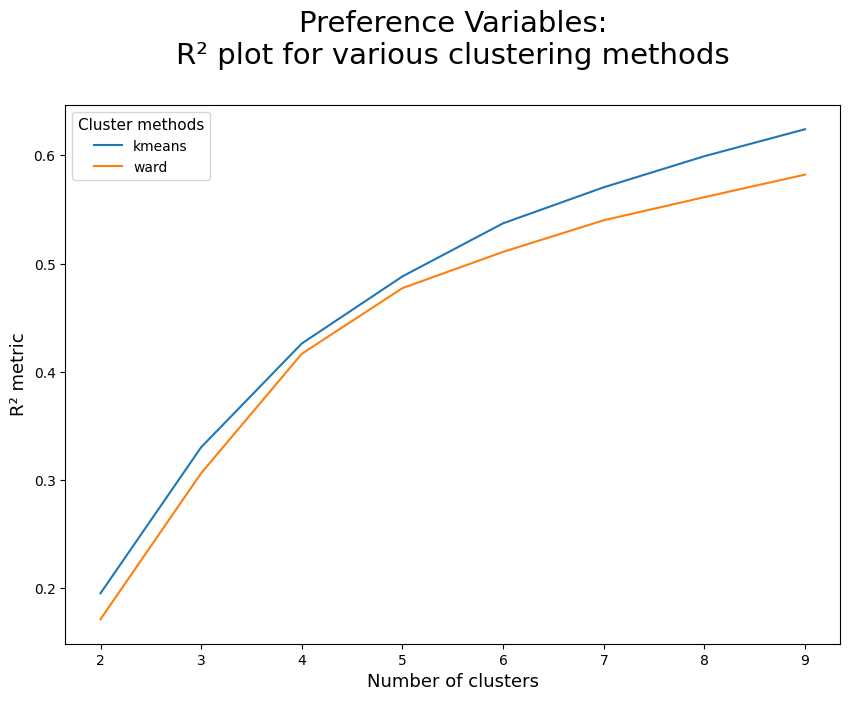

In [96]:
plot_r2_scores(dem_st_r2_scores_rc)

In [97]:
dem_mm_r2_scores_rc = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores_rc

,kmeans,ward
2,0.590280,0.586597
3,0.674448,0.649655
4,0.697051,0.684366
5,0.722868,0.710156
6,0.734918,0.731671
7,0.760591,0.749617
8,0.776809,0.765529
9,0.783615,0.780637


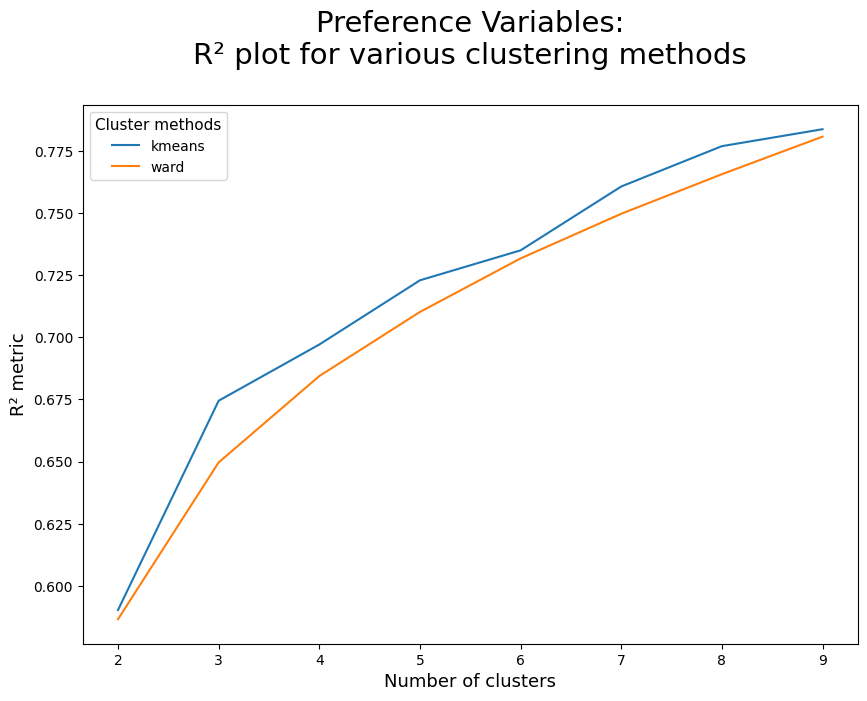

In [98]:
plot_r2_scores(dem_mm_r2_scores_rc)

In [99]:
dem_rb_r2_scores_rc = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores_rc

,kmeans,ward
2,0.190178,0.176308
3,0.335870,0.304613
4,0.400834,0.357480
5,0.447871,0.405383
6,0.488716,0.439508
7,0.524076,0.468960
8,0.549573,0.491719
9,0.572496,0.512572


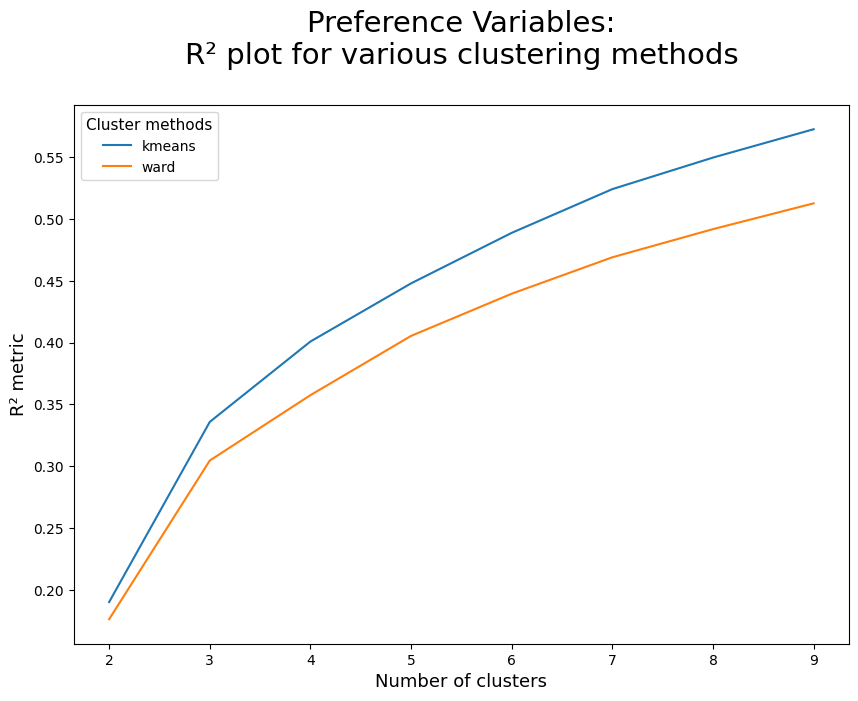

In [100]:
plot_r2_scores(dem_rb_r2_scores_rc)

## conjunto

In [101]:
# Prefix the names of the columns
df_no_prefixed_rc = dem_no_r2_scores_rc.add_prefix("rc_no_")
df_st_prefixed_rc = dem_st_r2_scores_rc.add_prefix("rc_st_")
df_mm_prefixed_rc = dem_mm_r2_scores_rc.add_prefix("rc_mm_")
df_rb_prefixed_rc = dem_rb_r2_scores_rc.add_prefix("rc_rb_")

# Concatenate the dataframes
df_combined_rc = pd.concat([df_no_prefixed_rc, df_st_prefixed_rc, df_mm_prefixed_rc, df_rb_prefixed_rc], axis=1)
df_combined_rc

,rc_no_kmeans,rc_no_ward,rc_st_kmeans,rc_st_ward,rc_mm_kmeans,rc_mm_ward,rc_rb_kmeans,rc_rb_ward
2,0.524931,0.524931,0.195269,0.171307,0.590280,0.586597,0.190178,0.176308
3,0.639290,0.636784,0.330293,0.306328,0.674448,0.649655,0.335870,0.304613
4,0.703854,0.690731,0.426209,0.416699,0.697051,0.684366,0.400834,0.357480
5,0.741635,0.726179,0.488243,0.477403,0.722868,0.710156,0.447871,0.405383
6,0.766593,0.746564,0.537315,0.510908,0.734918,0.731671,0.488716,0.439508
7,0.788046,0.765946,0.570604,0.540146,0.760591,0.749617,0.524076,0.468960
8,0.809109,0.783762,0.599351,0.561471,0.776809,0.765529,0.549573,0.491719
9,0.826549,0.799257,0.624287,0.582338,0.783615,0.780637,0.572496,0.512572


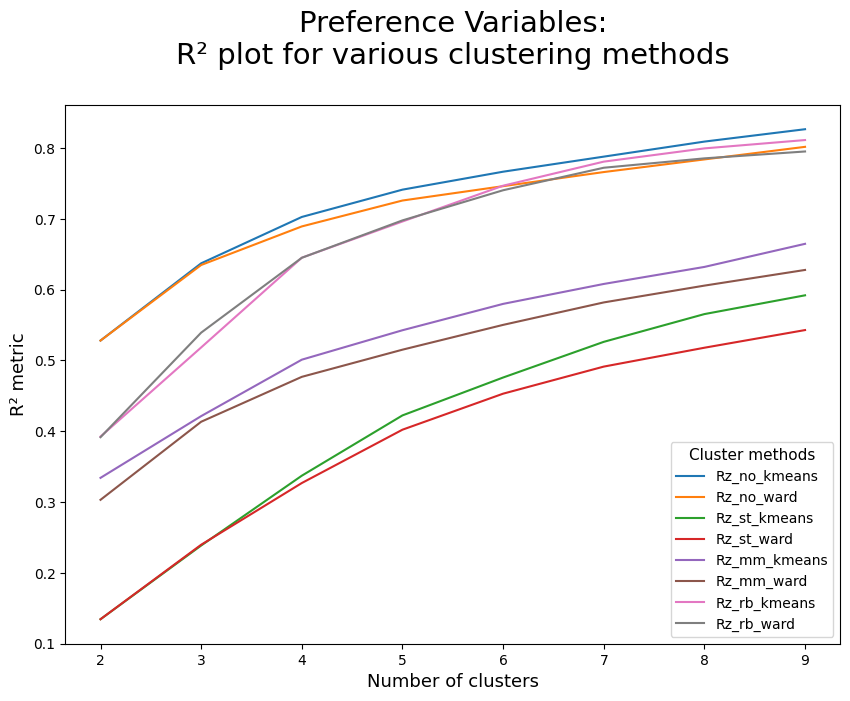

In [102]:
plot_r2_scores(df_combined_Rz)

In [ ]:
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor', 'zip_code']

In [ ]:
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor', 'zip_code']